In [ ]:
#Transforming Healthcare Through Data-Driven Insights: A Comprehensive Analysis of Patient Demographics, Medical Trends, and Operational Efficiency

In [83]:
#step 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy.stats import pearsonr, chi2_contingency

# Ensure the filename is in quotes
df = pd.read_csv("healthcare_dataset.csv")

# Display the first few rows of the DataFrame
print(df.head())


                  Name  Age  Gender Blood Type Medical Condition  \
0      Tiffany Ramirez   81  Female         O-          Diabetes   
1          Ruben Burns   35    Male         O+            Asthma   
2            Chad Byrd   61    Male         B-           Obesity   
3    Antonio Frederick   49    Male         B-            Asthma   
4  Mrs. Brandy Flowers   51    Male         O-         Arthritis   

  Date of Admission          Doctor                   Hospital  \
0        11/17/2022  Patrick Parker           Wallace-Hamilton   
1          6/1/2023   Diane Jackson  Burke, Griffin and Cooper   
2          1/9/2019      Paul Baker                 Walton LLC   
3          5/2/2020  Brian Chandler                 Garcia Ltd   
4          7/9/2021  Dustin Griffin    Jones, Brown and Murray   

  Insurance Provider  Billing Amount  Room Number Admission Type  \
0           Medicare     37490.98336          146       Elective   
1   UnitedHealthcare     47304.06485          404      Eme

In [5]:
#step 2a
#Check the basic structure of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [6]:
#step 2b
#Check for missing data in each column
print("\nMissing Data Summary:")
missing_data = df.isnull().sum()  # Counts missing values for each column
missing_data_percentage = (missing_data / len(df)) * 100  # Calculates missing data percentage
print(pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_data_percentage}))


Missing Data Summary:
                    Missing Values  Percentage
Name                             0         0.0
Age                              0         0.0
Gender                           0         0.0
Blood Type                       0         0.0
Medical Condition                0         0.0
Date of Admission                0         0.0
Doctor                           0         0.0
Hospital                         0         0.0
Insurance Provider               0         0.0
Billing Amount                   0         0.0
Room Number                      0         0.0
Admission Type                   0         0.0
Discharge Date                   0         0.0
Medication                       0         0.0
Test Results                     0         0.0


In [7]:
#step 2c
#Basic statistical summary of numerical columns
print("\nStatistical Summary of Numerical Columns:")
print(df.describe())  # Provides count, mean, std, min, 25%, 50%, 75%, max for numerical columns


Statistical Summary of Numerical Columns:
                Age  Billing Amount   Room Number
count  10000.000000    10000.000000  10000.000000
mean      51.452200    25516.806778    300.082000
std       19.588974    14067.292709    115.806027
min       18.000000     1000.180837    101.000000
25%       35.000000    13506.523967    199.000000
50%       52.000000    25258.112565    299.000000
75%       68.000000    37733.913725    400.000000
max       85.000000    49995.902280    500.000000


In [8]:
#Summary of categorical columns
print("\nCategorical Column Value Counts:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())  # Counts unique values for each categorical column


Categorical Column Value Counts:

Column: Name
Name
Michael Johnson        7
James Johnson          6
Michael Miller         4
Michelle Williams      4
Scott Smith            4
                      ..
Sharon Rose            1
Stephanie Knox         1
Anthony Jones          1
Melissa Perkins DVM    1
Eric King              1
Name: count, Length: 9378, dtype: int64

Column: Gender
Gender
Female    5075
Male      4925
Name: count, dtype: int64

Column: Blood Type
Blood Type
AB-    1275
AB+    1258
B-     1252
O+     1248
O-     1244
B+     1244
A+     1241
A-     1238
Name: count, dtype: int64

Column: Medical Condition
Medical Condition
Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: count, dtype: int64

Column: Date of Admission
Date of Admission
4/12/2019     15
4/27/2022     15
10/23/2021    14
3/27/2023     14
10/1/2022     14
              ..
7/16/2022      1
6/15/2022      1
12/11/2022     1
10/28

In [4]:
#step 3
# Convert columns to appropriate data types
# 1. Convert 'Date of Admission' and 'Discharge Date' to datetime format
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])


# 2. Convert categorical columns (e.g., 'Gender', 'Blood Type') to 'category' dtype for efficiency
categorical_columns = ['Gender', 'Blood Type', 'Medical Condition', 'Doctor', 
                       'Hospital', 'Insurance Provider', 'Admission Type', 
                       'Medication', 'Test Results']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Check data types to confirm changes
print("\nUpdated Data Types:")
print(df.dtypes)




Updated Data Types:
Name                          object
Age                            int64
Gender                      category
Blood Type                  category
Medical Condition           category
Date of Admission     datetime64[ns]
Doctor                      category
Hospital                    category
Insurance Provider          category
Billing Amount               float64
Room Number                    int64
Admission Type              category
Discharge Date        datetime64[ns]
Medication                  category
Test Results                category
dtype: object



Age Outliers:
Empty DataFrame
Columns: [Name, Age]
Index: []

Billing Amount Outliers:
Empty DataFrame
Columns: [Name, Billing Amount]
Index: []


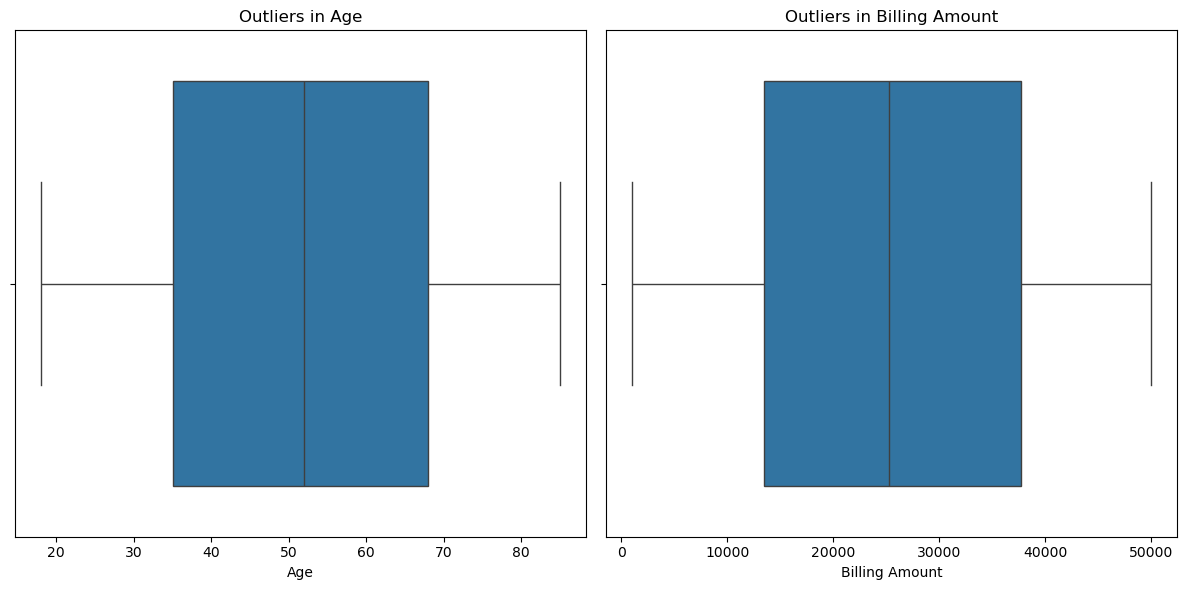

In [5]:
# 3. Identify outliers in the 'Age' and 'Billing Amount' columns
# Using the IQR method to flag potential outliers
def identify_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Find outliers for 'Age' and 'Billing Amount'
age_outliers = identify_outliers('Age')
billing_outliers = identify_outliers('Billing Amount')

# Display outliers
print("\nAge Outliers:")
print(age_outliers[['Name', 'Age']])

print("\nBilling Amount Outliers:")
print(billing_outliers[['Name', 'Billing Amount']])

# 4. Check for outliers in 'Age' and 'Billing Amount' columns using boxplot
plt.figure(figsize=(12, 6))

# Plot for Age
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'])
plt.title('Outliers in Age')

# Plot for Billing Amount
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Billing Amount'])
plt.title('Outliers in Billing Amount')

plt.tight_layout()
plt.savefig("outliers.png")
plt.show()

In [11]:
# Step 4: Data Transformation

# 1. Create 'Admission Duration' column by calculating the difference between discharge and admission dates
df['Admission Duration'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# 2. Create 'Age Group' column based on age ranges
# Define age group bins and labels
age_bins = [0, 18, 35, 50, 65, 100]  # Modify ranges as appropriate
age_labels = ['0-17', '18-34', '35-49', '50-64', '65+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# 3. Save the transformed DataFrame to a new CSV file
df.to_csv("healthcare_dataset_transformed_1.csv", index=False)

# Confirm creation of new columns
print("\nNew Columns Created:")
print(df[['Admission Duration', 'Age Group']].head())
print("\nData saved to 'healthcare_dataset_transformed.csv'")




New Columns Created:
   Admission Duration Age Group
0                  14       65+
1                  14     35-49
2                  30     50-64
3                   1     35-49
4                  24     50-64

Data saved to 'healthcare_dataset_transformed.csv'


In [12]:
# Step 4: Data Transformation (Updated Age Groups)

# 1. Create 'Admission Duration' column by calculating the difference between discharge and admission dates
df['Admission Duration'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# 2. Create 'Age Group' column with the updated labels
# Define updated age group bins and labels
age_bins = [18, 35, 50, 65, 100]  # Starting from 18+
age_labels = [
    'Young Adults', # (18-34 years)
    'Middle-Aged Adults', # (Young Middle-Aged) (35-49 years)
    'Older Middle-Aged Adults', # (50-64 years)
    'Seniors' #(65+ years)
]
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# 3. Save the transformed DataFrame to a new CSV file
df.to_csv("healthcare_dataset_transformed.csv", index=False)

# Confirm creation of new columns
print("\nNew Columns Created:")
print(dh[['Admission Duration', 'Age Group']].head())
print("\nData saved to 'healthcare_dataset_transformed.csv'")



New Columns Created:
   Admission Duration                 Age Group
0                  14                   Seniors
1                  14        Middle-Aged Adults
2                  30  Older Middle-Aged Adults
3                   1        Middle-Aged Adults
4                  24  Older Middle-Aged Adults

Data saved to 'healthcare_dataset_transformed.csv'


In [7]:
# Ensure the filename is in quotes
dh = pd.read_csv("healthcare_dataset_transformed.csv")

# Display the first few rows of the DataFrame
print(dh.head())

                  Name  Age  Gender Blood Type Medical Condition  \
0      Tiffany Ramirez   81  Female         O-          Diabetes   
1          Ruben Burns   35    Male         O+            Asthma   
2            Chad Byrd   61    Male         B-           Obesity   
3    Antonio Frederick   49    Male         B-            Asthma   
4  Mrs. Brandy Flowers   51    Male         O-         Arthritis   

  Date of Admission          Doctor                   Hospital  \
0        2022-11-17  Patrick Parker           Wallace-Hamilton   
1        2023-06-01   Diane Jackson  Burke, Griffin and Cooper   
2        2019-01-09      Paul Baker                 Walton LLC   
3        2020-05-02  Brian Chandler                 Garcia Ltd   
4        2021-07-09  Dustin Griffin    Jones, Brown and Murray   

  Insurance Provider  Billing Amount  Room Number Admission Type  \
0           Medicare     37490.98336          146       Elective   
1   UnitedHealthcare     47304.06485          404      Eme

In [64]:
#step 4b
#Check the basic structure of the dataset
print(dh.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Name                10000 non-null  object  
 1   Age                 10000 non-null  int64   
 2   Gender              10000 non-null  object  
 3   Blood Type          10000 non-null  object  
 4   Medical Condition   10000 non-null  object  
 5   Date of Admission   10000 non-null  object  
 6   Doctor              10000 non-null  object  
 7   Hospital            10000 non-null  object  
 8   Insurance Provider  10000 non-null  object  
 9   Billing Amount      10000 non-null  float64 
 10  Room Number         10000 non-null  int64   
 11  Admission Type      10000 non-null  object  
 12  Discharge Date      10000 non-null  object  
 13  Medication          10000 non-null  object  
 14  Test Results        10000 non-null  object  
 15  Admission Duration  10000 non-null  i


Gender Distribution:
Gender
Female    5075
Male      4925
Name: count, dtype: int64


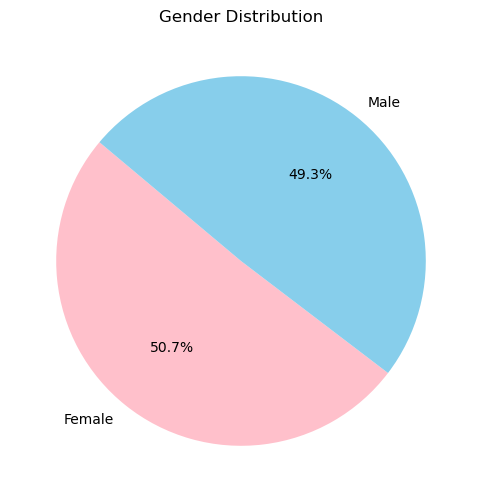

In [12]:
# Step 5: Exploratory Data Analysis (EDA)

# 1. Patient Demographics
# Gender Distribution
print("\nGender Distribution:")
print(dh['Gender'].value_counts())

plt.figure(figsize=(6, 6))
dh['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['pink', 'skyblue'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.savefig("age.png")
plt.show()

Medical Condition  Arthritis  Asthma  Cancer  Diabetes  Hypertension  Obesity
Gender                                                                       
Female                   815     874     887       825           836      838
Male                     835     834     816       798           852      790


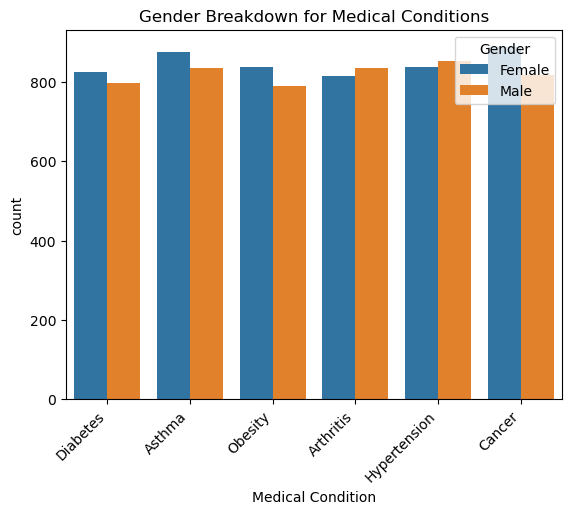

    Medication  Gender  Name
0      Aspirin  Female  1011
1      Aspirin    Male   957
2    Ibuprofen  Female   999
3    Ibuprofen    Male   977
4      Lipitor  Female  1016
5      Lipitor    Male   999
6  Paracetamol  Female  1022
7  Paracetamol    Male   940
8   Penicillin  Female  1027
9   Penicillin    Male  1052


In [81]:
# Create a cross-tabulation of gender and medical condition
gender_condition_crosstab = pd.crosstab(dh['Gender'], dh['Medical Condition'])
print(gender_condition_crosstab)

# Visualize the gender breakdown for a specific medical condition
sns.countplot(x='Medical Condition', hue='Gender', data=dh)
plt.title('Gender Breakdown for Medical Conditions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Compare the number of male vs. female patients for a specific treatment
treatment_gender_counts = dh.groupby(['Medication', 'Gender'])['Name'].count().reset_index()
print(treatment_gender_counts)

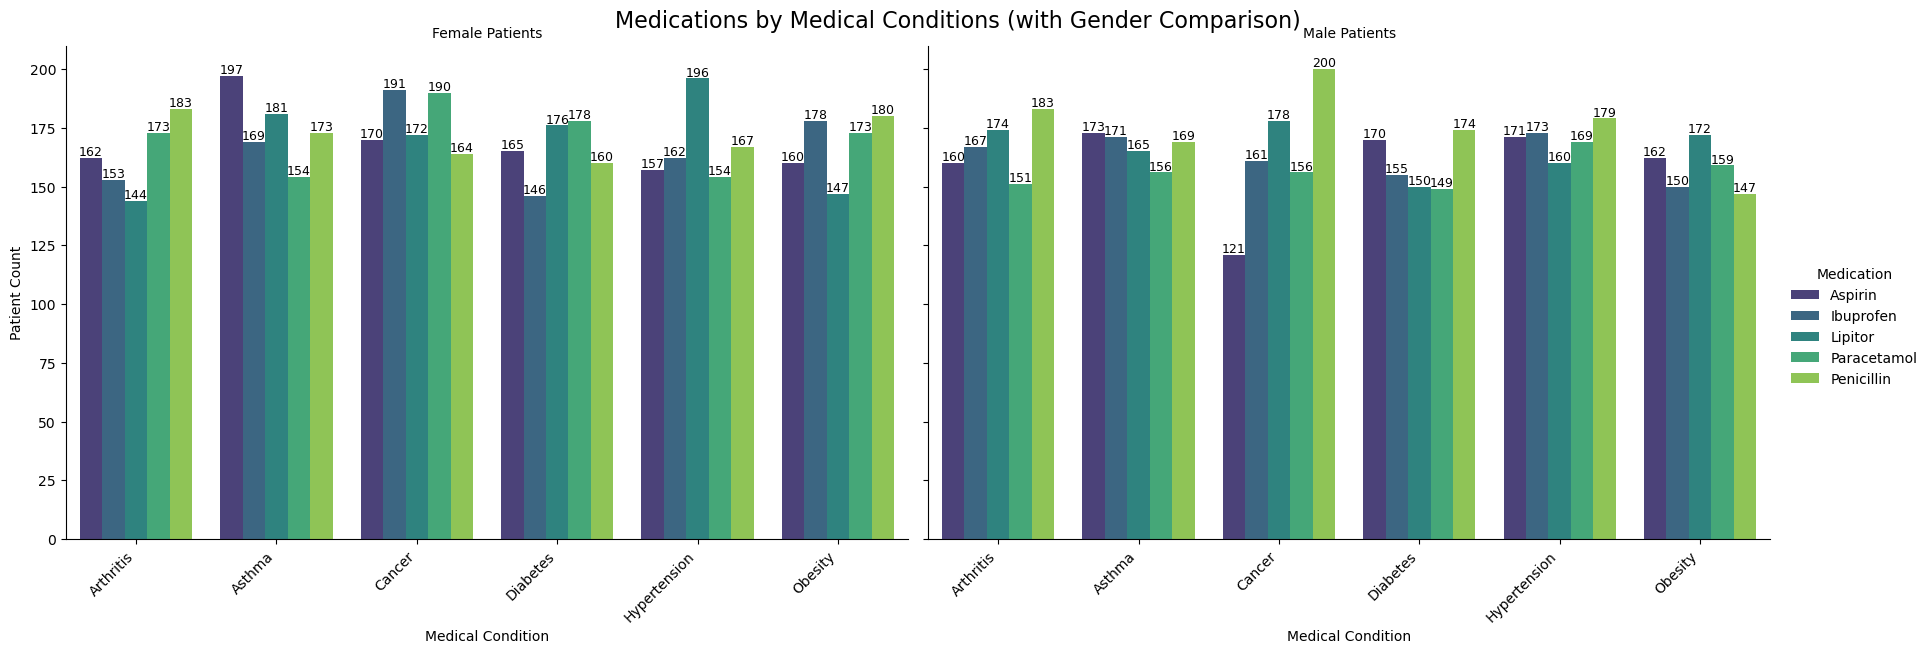

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot for counts grouped by Medical Condition, Medication, and Gender
pivot_data = (
    dh.groupby(['Medical Condition', 'Medication', 'Gender'])['Name']
    .count()
    .reset_index()
    .rename(columns={'Name': 'Count'})
)

# Add total counts for each medical condition
pivot_data['Total'] = pivot_data.groupby('Medical Condition')['Count'].transform('sum')

# Set up a FacetGrid for gender comparisons
g = sns.catplot(
    data=pivot_data,
    kind="bar",
    x="Medical Condition",
    y="Count",
    hue="Medication",
    col="Gender",
    col_wrap=2,  # Wrap columns for readability
    height=6,
    aspect=1.5,
    palette="viridis",
    legend_out=True
)

# Adjust bar labels for individual medication counts and totals
for ax in g.axes.flat:
    # Get the current gender displayed
    gender = ax.get_title().split(' ')[0]
    
    # Filter data for the respective gender
    gender_data = pivot_data[pivot_data['Gender'] == gender]
    
    for container in ax.containers:
        # Attach labels for individual medication counts
        for bar in container:
            height = bar.get_height()
            if height > 0:
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    height + 1,
                    f'{int(height)}',
                    ha='center',
                    fontsize=9
                )

    # Attach total counts above each grouped condition
    for condition, total in gender_data.groupby('Medical Condition')['Total'].max().items():
        condition_index = gender_data['Medical Condition'].unique().tolist().index(condition)
        ax.text(
            x=condition_index,
            y=total + 5,  # Place the label above the bars
            s=f'Total: {int(total)}',
            ha='center',
            fontsize=10,
            fontweight='bold',
            color='red'
        )

# Adjust titles and layout for better readability
g.set_titles("{col_name} Patients")
g.set_axis_labels("Medical Condition", "Patient Count")
g.set_xticklabels(rotation=45, ha="right")
g.fig.subplots_adjust(top=0.92)  # Adjust the plot to fit the title
g.fig.suptitle("Medications by Medical Conditions (with Gender Comparison)", fontsize=16)

# Save the plot
plt.savefig("medications_by_condition_gender.png")
plt.show()


In [66]:
import pandas as pd

# Create a pivot table to display counts grouped by Medical Condition, Medication, and Gender
table_data = (
    dh.groupby(['Medical Condition', 'Medication', 'Gender'])['Name']
    .count()
    .reset_index()
    .rename(columns={'Name': 'Count'})
)

# Pivot the data to create a table format
pivot_table = table_data.pivot_table(
    index=['Medical Condition', 'Medication'],
    columns='Gender',
    values='Count',
    aggfunc='sum',
    fill_value=0
).reset_index()

# Rename columns for better readability
pivot_table.columns.name = None  # Remove the 'Gender' heading from the columns
pivot_table.rename(columns={'Female': 'Female Count', 'Male': 'Male Count'}, inplace=True)

# Add a 'Total' column for each medication and condition
pivot_table['Total Count'] = pivot_table['Female Count'] + pivot_table['Male Count']

# Display the pivot table
print(pivot_table)

# Save the table to an Excel file for reporting purposes
pivot_table.to_excel("medications_by_condition_gender_table.xlsx", index=False)

print("Table saved as 'medications_by_condition_gender_table.xlsx'")


   Medical Condition   Medication  Female Count  Male Count  Total Count
0          Arthritis      Aspirin           162         160          322
1          Arthritis    Ibuprofen           153         167          320
2          Arthritis      Lipitor           144         174          318
3          Arthritis  Paracetamol           173         151          324
4          Arthritis   Penicillin           183         183          366
5             Asthma      Aspirin           197         173          370
6             Asthma    Ibuprofen           169         171          340
7             Asthma      Lipitor           181         165          346
8             Asthma  Paracetamol           154         156          310
9             Asthma   Penicillin           173         169          342
10            Cancer      Aspirin           170         121          291
11            Cancer    Ibuprofen           191         161          352
12            Cancer      Lipitor           172    

C:\Users\heptu\AppData\Local\Temp\ipykernel_23596\1616463542.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


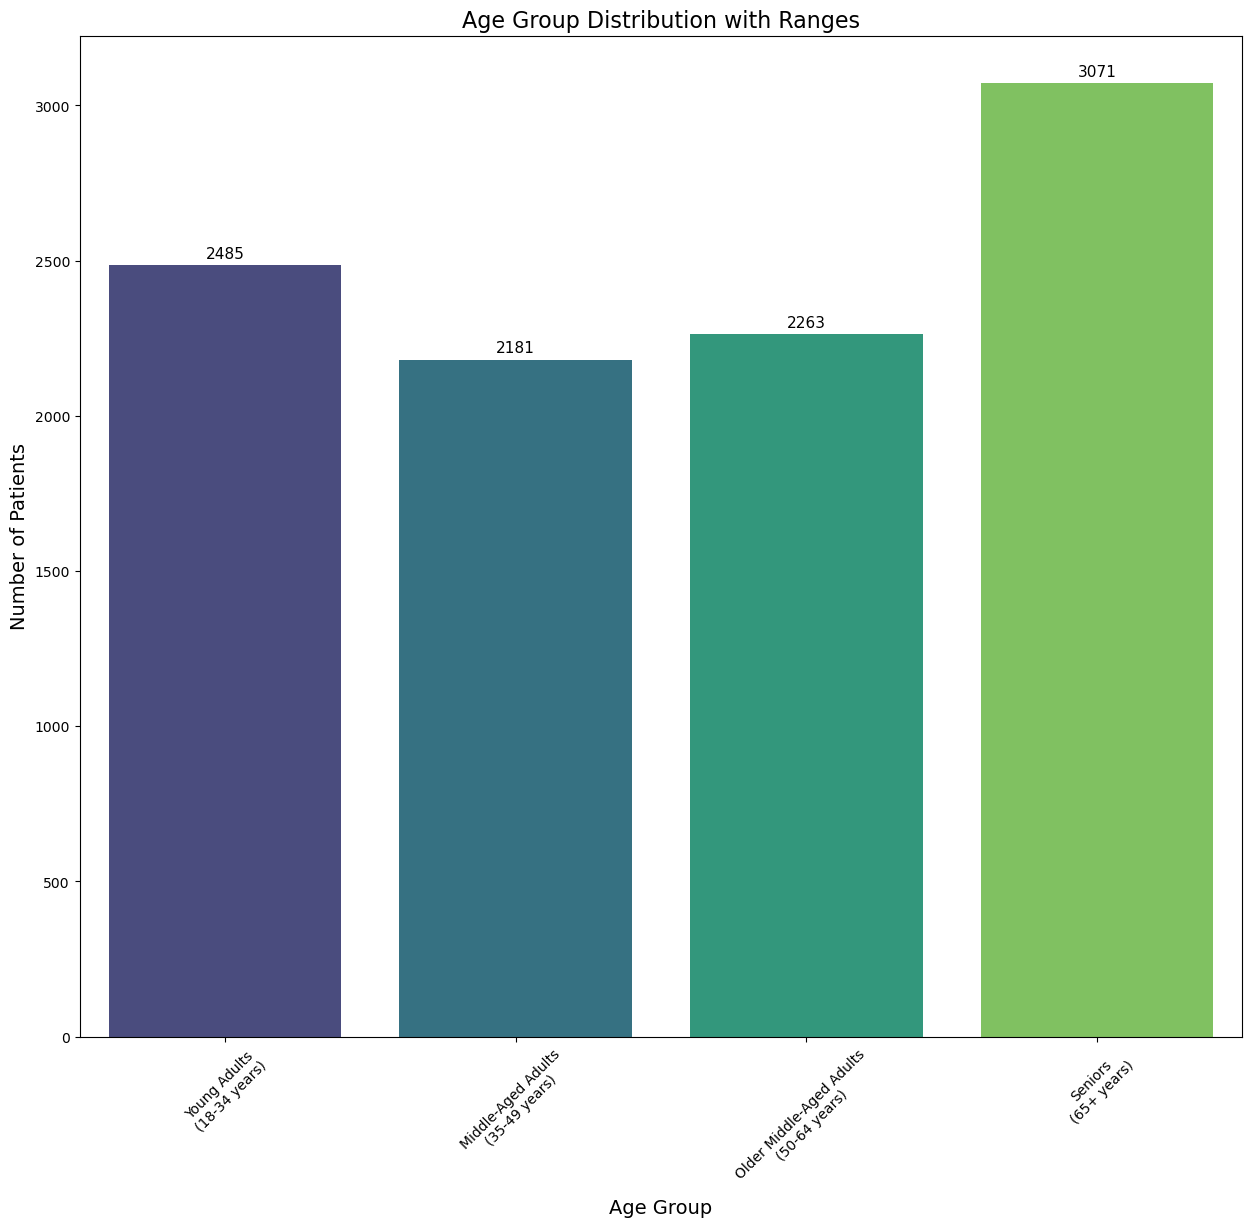

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the figure size
plt.figure(figsize=(15, 13))

# Define age ranges and labels
age_bins = [18, 35, 50, 65, 100]
age_labels = [
    'Young Adults\n(18-34 years)',
    'Middle-Aged Adults\n(35-49 years)',
    'Older Middle-Aged Adults\n(50-64 years)',
    'Seniors\n(65+ years)'
]

# Update the "Age Group" column in the data to match the age_labels
dh['Age Group'] = pd.cut(dh['Age'], bins=age_bins, labels=age_labels, right=False)

# Create the countplot
ax = sns.countplot(
    data=dh,
    x='Age Group',
    palette='viridis',
    order=age_labels,  # Ensures the order matches the labels
    dodge=False
)

# Add the counts on top of the bars
for p in ax.patches:
    count = int(p.get_height())  # Get the height of each bar
    ax.annotate(
        f'{count}',  # Annotation text
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position above the bar
        ha='center',  # Center align horizontally
        va='baseline',  # Align to baseline vertically
        fontsize=11,  # Adjust the font size
        color='black',  # Font color
        xytext=(0, 5),  # Add a little space above the bar
        textcoords="offset points"
    )

# Titles and labels
plt.title('Age Group Distribution with Ranges', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.xticks(rotation=45)

# Save and display the plot
plt.savefig("age_distribution_with_ranges.png")
plt.show()


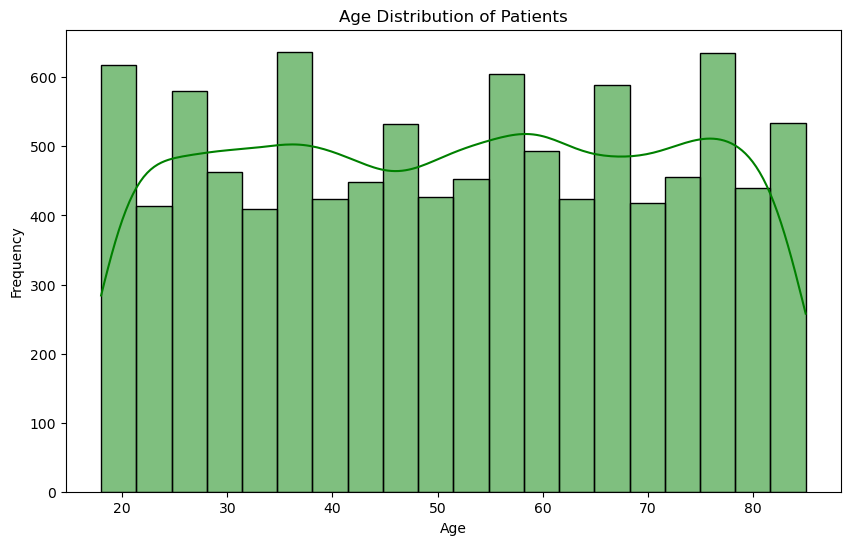

count    10000.000000
mean        51.452200
std         19.588974
min         18.000000
25%         35.000000
50%         52.000000
75%         68.000000
max         85.000000
Name: Age, dtype: float64
Age
(50, 60]     1543
(70, 80]     1520
(30, 40]     1504
(60, 70]     1448
(20, 30]     1438
(40, 50]     1389
(80, 90]      693
(10, 20]      465
(0, 10]         0
(90, 100]       0
Name: count, dtype: int64


In [80]:
# Create a histogram of patient ages
plt.figure(figsize=(10, 6))
sns.histplot(dh['Age'], bins=20, color = 'green', kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig("age_distribution.png")
plt.show()

# Calculate some descriptive statistics for age
print(dh['Age'].describe())

# Identify the most common age groups using value_counts()
age_groups = pd.cut(dh['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
print(age_groups.value_counts())

C:\Users\heptu\AppData\Local\Temp\ipykernel_23596\3739583910.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Blood Type', data=dh, palette='viridis')


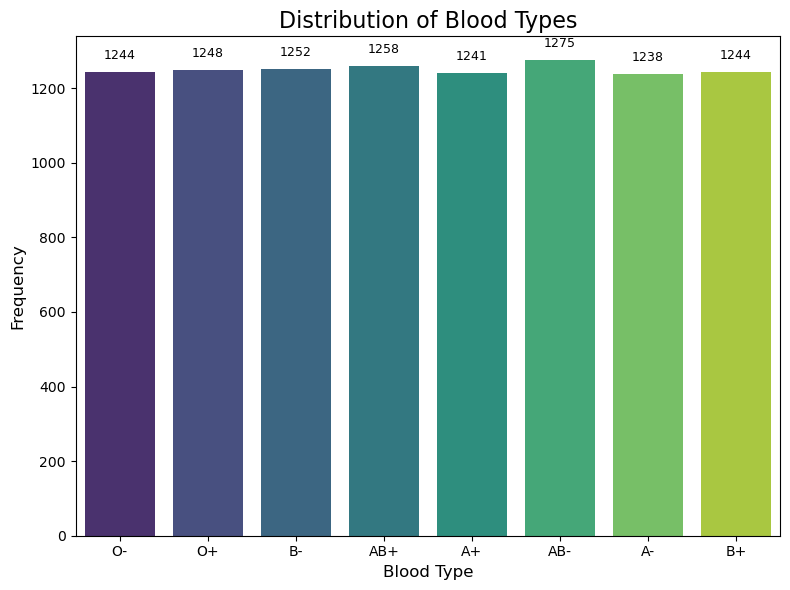

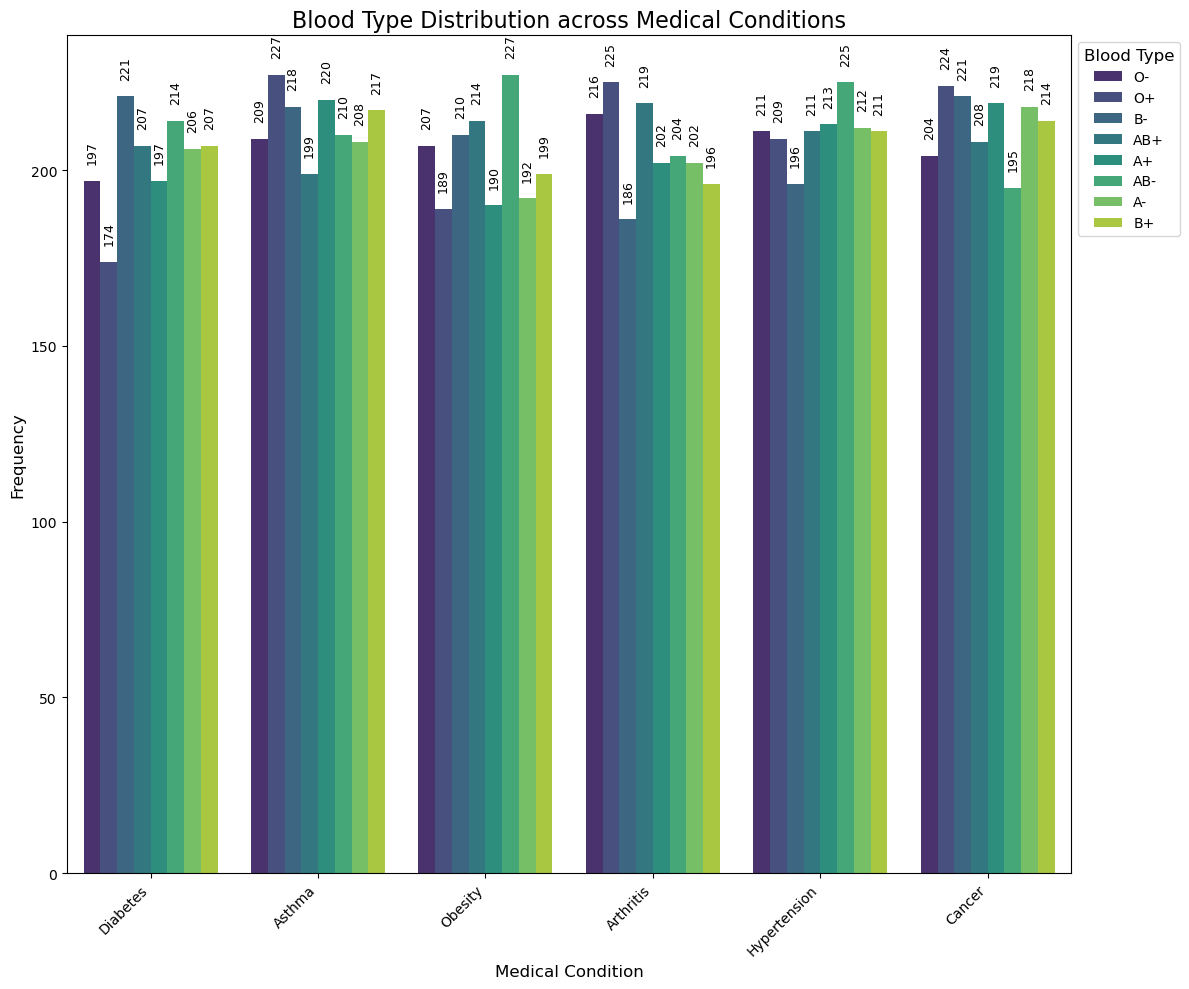

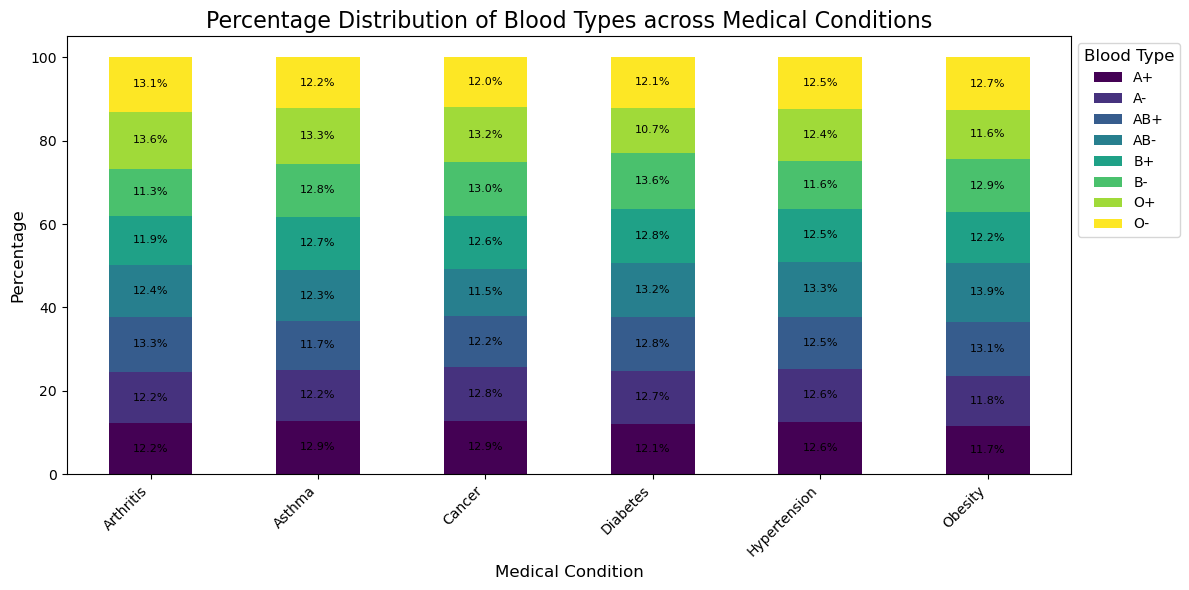

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to add counts on bars with better spacing
def add_counts(ax):
    for bar in ax.patches:
        height = bar.get_height()
        if not pd.isna(height) and height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # X position
                height + (0.02 * ax.get_ylim()[1]),  # Y position (slightly above the bar)
                f'{int(height)}',                  # Text to display
                ha='center', va='bottom', fontsize=9, color='black'
            )

# Plot 1: Distribution of Blood Types
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Blood Type', data=dh, palette='viridis')
plt.title('Distribution of Blood Types', fontsize=16)
plt.xlabel('Blood Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
add_counts(ax)  # Add counts on bars with better spacing
plt.tight_layout()
plt.savefig("b_percentage.png")
plt.show()



# Plot 2: Blood Type Distribution across Medical Conditions with vertical counts
plt.figure(figsize=(12, 10))
ax = sns.countplot(x='Medical Condition', hue='Blood Type', data=dh, palette='viridis')
plt.title('Blood Type Distribution across Medical Conditions', fontsize=16)
plt.xlabel('Medical Condition', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Blood Type', fontsize=10, title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

# Add counts with vertical orientation
for bar in ax.patches:
    height = bar.get_height()
    if not pd.isna(height) and height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X position
            height + (0.02 * ax.get_ylim()[1]),  # Y position (above the bar)
            f'{int(height)}',                  # Text to display
            ha='center', va='bottom', rotation=90, fontsize=9, color='black'  # Rotate text vertically
        )

plt.tight_layout()
plt.savefig("n_percentage.png")
plt.show()

# Plot 3: Percentage Distribution of Blood Types across Medical Conditions
blood_type_percentages = dh.groupby('Medical Condition')['Blood Type'].value_counts(normalize=True).unstack() * 100
ax = blood_type_percentages.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Percentage Distribution of Blood Types across Medical Conditions', fontsize=16)
plt.xlabel('Medical Condition', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Blood Type', fontsize=10, title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

# Annotate percentages inside the bars
for container in ax.containers:
    labels = [f'{v:.1f}%' if v > 0 else '' for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=8)

plt.tight_layout()
plt.savefig("percentage.png")
plt.show()



Disease Distribution by Blood Group:
Medical Condition  Arthritis  Asthma  Cancer  Diabetes  Hypertension  Obesity
Blood Type                                                                   
A+                       202     220     219       197           213      190
A-                       202     208     218       206           212      192
AB+                      219     199     208       207           211      214
AB-                      204     210     195       214           225      227
B+                       196     217     214       207           211      199
B-                       186     218     221       221           196      210
O+                       225     227     224       174           209      189
O-                       216     209     204       197           211      207


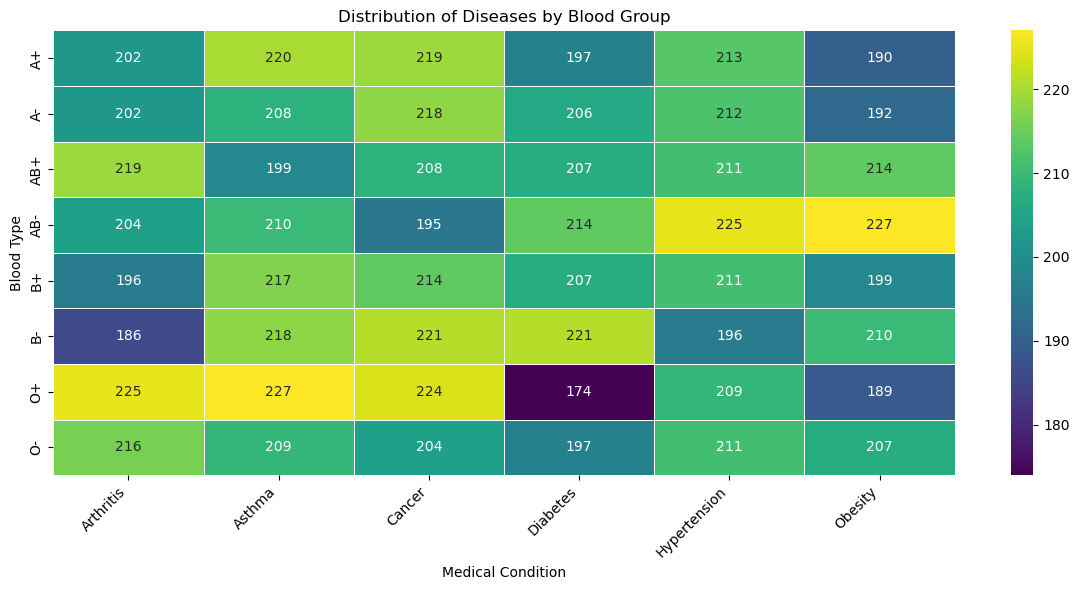

In [24]:
# Disease distribution across blood groups
disease_blood_group = dh.groupby(['Blood Type', 'Medical Condition']).size().unstack().fillna(0)

print("\nDisease Distribution by Blood Group:")
print(disease_blood_group)

plt.figure(figsize=(12, 6))
sns.heatmap(disease_blood_group, cmap='viridis', linewidths=0.5, annot=True, fmt=".0f")
plt.title('Distribution of Diseases by Blood Group')
plt.xlabel('Medical Condition')
plt.ylabel('Blood Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("Distribution_of_Diseases_by_Blood_Group.png")
plt.show()


In [85]:
# Create a cross-tabulation of blood type and medical condition
blood_type_condition_crosstab = pd.crosstab(dh['Blood Type'], dh['Medical Condition'])
print(blood_type_condition_crosstab)

Medical Condition  Arthritis  Asthma  Cancer  Diabetes  Hypertension  Obesity
Blood Type                                                                   
A+                       202     220     219       197           213      190
A-                       202     208     218       206           212      192
AB+                      219     199     208       207           211      214
AB-                      204     210     195       214           225      227
B+                       196     217     214       207           211      199
B-                       186     218     221       221           196      210
O+                       225     227     224       174           209      189
O-                       216     209     204       197           211      207


In [86]:
# prompt: Use chi-square tests to determine if there are significant associations between blood type and medical conditions.

# Perform chi-square test for association between blood type and medical condition
chi2, p, dof, expected = chi2_contingency(blood_type_condition_crosstab)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:\n", expected)

# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
    print("There is a statistically significant association between blood type and medical condition.")
else:
    print("There is no statistically significant association between blood type and medical condition.")

Chi-square statistic: 25.565876597152375
P-value: 0.8783682212400656
Degrees of freedom: 35
Expected frequencies:
 [[204.765  211.9628 211.3423 201.4143 209.4808 202.0348]
 [204.27   211.4504 210.8314 200.9274 208.9744 201.5464]
 [207.57   214.8664 214.2374 204.1734 212.3504 204.8024]
 [210.375  217.77   217.1325 206.9325 215.22   207.57  ]
 [205.26   212.4752 211.8532 201.9012 209.9872 202.5232]
 [206.58   213.8416 213.2156 203.1996 211.3376 203.8256]
 [205.92   213.1584 212.5344 202.5504 210.6624 203.1744]
 [205.26   212.4752 211.8532 201.9012 209.9872 202.5232]]
There is no statistically significant association between blood type and medical condition.


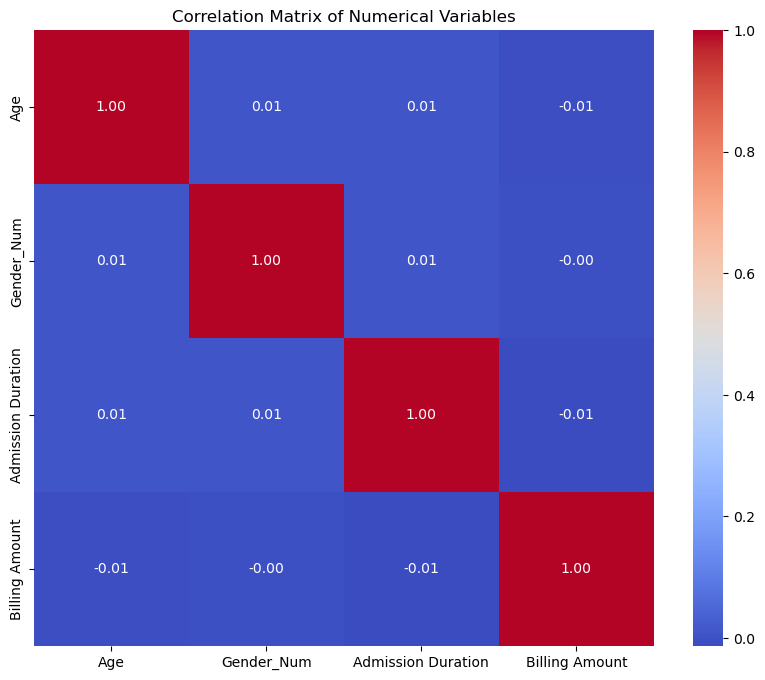

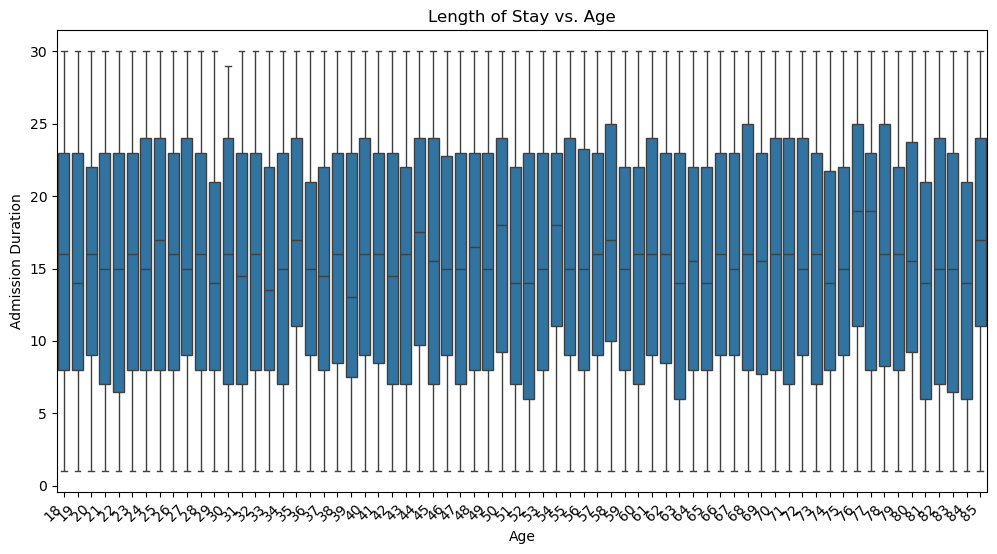


Analysis for Diabetes:
               Age  Billing Amount  Room Number  Admission Duration  \
count  1623.000000     1623.000000  1623.000000         1623.000000   
mean     51.802218    26060.116129   297.848429           15.574245   
std      19.765947    14013.920497   115.304365            8.501425   
min      18.000000     1071.456127   101.000000            1.000000   
25%      35.000000    14261.633315   199.000000            8.000000   
50%      53.000000    26162.203250   296.000000           16.000000   
75%      69.000000    38420.859485   397.500000           23.000000   
max      85.000000    49954.968330   500.000000           30.000000   

        Gender_Num  
count  1623.000000  
mean      0.508318  
std       0.500085  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000  

Analysis for Asthma:
               Age  Billing Amount  Room Number  Admission Duration  \
count  1708.000000     1708.000000  1708.000000       

In [92]:
# Explore the correlation between age, gender, and blood type with other variables like length of stay, billing amount, and medical condition.

# Correlation analysis between age, gender, blood type, and other variables

# Convert gender to numerical representation for correlation analysis
dh['Gender_Num'] = dh['Gender'].map({'Male': 0, 'Female': 1})

# Calculating Pearson correlation coefficients
correlation_columns = ['Age', 'Gender_Num', 'Admission Duration', 'Billing Amount']  # Add other relevant columns
correlation_matrix = dh[correlation_columns].corr()

# Visualizing the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Further examples would involve using Cramer's V or Theil's U for more complex relationships

# Explore trends in length of stay for different age groups
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='Admission Duration', data=dh)
plt.title('Length of Stay vs. Age')
plt.xlabel('Age')
plt.ylabel('Admission Duration')
plt.xticks(rotation=45, ha='right')
plt.savefig("Length_of_Stay_(days).png")
plt.show()

# ... similar plots for billing amount vs age, length of stay vs gender, etc.

# Group data by medical condition and analyze other variables within each group
for condition in dh['Medical Condition'].unique():
    condition_data = dh[dh['Medical Condition'] == condition]
    print(f"\nAnalysis for {condition}:")
    print(condition_data.describe())
    # Add further analyses (e.g., distributions, correlations) for each medical condition

# Additional statistical tests:
# - ANOVA (analysis of variance) to compare means across different groups (e.g., age groups, genders)
# - t-tests to compare means of two groups
# - Mann-Whitney U test or Kruskal-Wallis test for non-parametric comparisons if data isn't normally distributed

In [103]:
import pandas as pd

# Step 1: Calculate the average admission duration for each medical condition and hospital
hospital_duration = (
    filtered_data.groupby(['Hospital', 'Medical Condition'])['Admission Duration']
    .mean()
    .reset_index()
    .rename(columns={'Admission Duration': 'Average Duration'})
)

# Step 2: Create a pivot table to display the data in a tabular format
pivot_table = hospital_duration.pivot_table(
    index='Medical Condition',    # Rows: Medical Conditions
    columns='Hospital',            # Columns: Hospitals
    values='Average Duration',     # Values: Average Admission Duration
    aggfunc='mean',                # In case of multiple rows per condition and hospital
    fill_value=0                   # Fill NaN values with 0 if necessary
).reset_index()

# Step 3: Display the table
print(pivot_table)

# Optional: Save the table to an Excel file for further reporting or sharing
pivot_table.to_excel('average_admission_duration_by_condition_and_hospital.xlsx', index=False)

print("Table saved as 'average_admission_duration_by_condition_and_hospital.xlsx'")


Hospital Medical Condition  Brown LLC  Davis and Sons  Johnson Group  \
0                Arthritis  19.000000           16.25           9.25   
1                   Asthma   0.000000            0.00           0.00   
2                   Cancer  14.500000           12.00          13.75   
3                 Diabetes   9.000000            6.50           0.00   
4             Hypertension  10.000000            0.00          14.00   
5                  Obesity  17.333333            1.00           0.00   

Hospital  Johnson Ltd  Johnson PLC  Jones Inc  Jones LLC  Jones Ltd  \
0           11.000000     6.000000  19.666667  20.666667   0.000000   
1           13.500000    10.750000   0.000000  22.000000  16.000000   
2           17.500000     6.000000  13.000000  30.000000   0.000000   
3           11.333333    11.500000  27.000000   9.500000  29.000000   
4            0.000000    15.666667   7.000000  18.000000  15.666667   
5           13.500000    15.000000  11.000000   3.000000  24.500000  

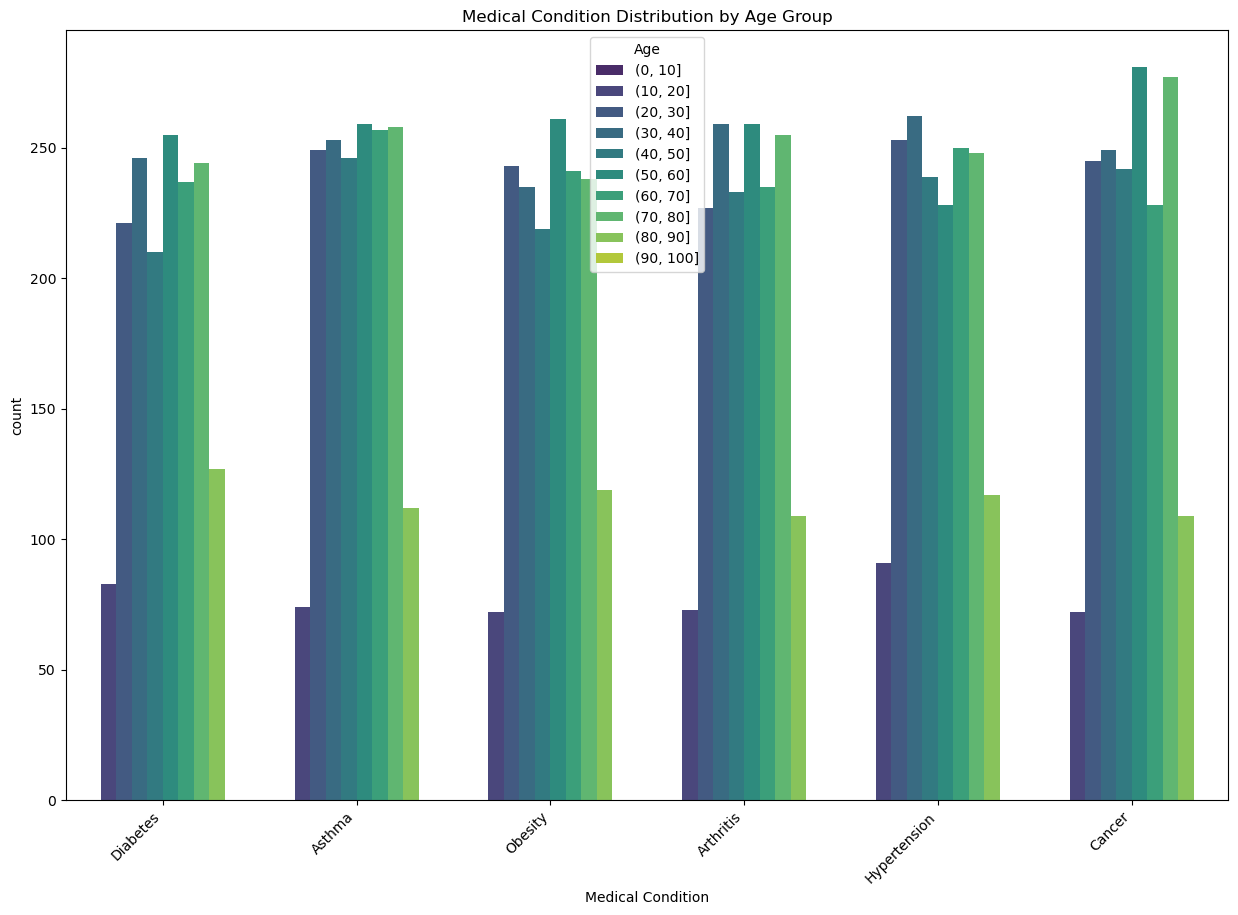

In [98]:
# Count the occurrences of each medical condition
condition_counts = dh['Medical Condition'].value_counts()


# Condition by Age
plt.figure(figsize=(15, 10))
sns.countplot(x='Medical Condition', hue=age_groups, data=dh, palette='viridis')  # Using age_groups from before
plt.title('Medical Condition Distribution by Age Group')
plt.xticks(rotation=45, ha='right')
plt.savefig("g.png")
plt.show()


Prevalence of Conditions by Age Group and Gender:
Medical Condition                               Arthritis     Asthma  \
Age Group                               Gender                         
Young Adults\n(18-34 years)             Female  16.400000  16.560000   
                                        Male    15.708502  17.651822   
Middle-Aged Adults\n(35-49 years)       Female  16.726619  16.726619   
                                        Male    17.305893  17.960711   
Older Middle-Aged Adults\n(50-64 years) Female  15.418895  17.647059   
                                        Male    17.265557  16.476775   
Seniors\n(65+ years)                    Female  15.776241  17.787555   
                                        Male    17.500000  15.945946   

Medical Condition                                  Cancer   Diabetes  \
Age Group                               Gender                         
Young Adults\n(18-34 years)             Female  16.320000  16.320000   
             

C:\Users\heptu\AppData\Local\Temp\ipykernel_23596\573216208.py:30: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = pd.pivot_table(


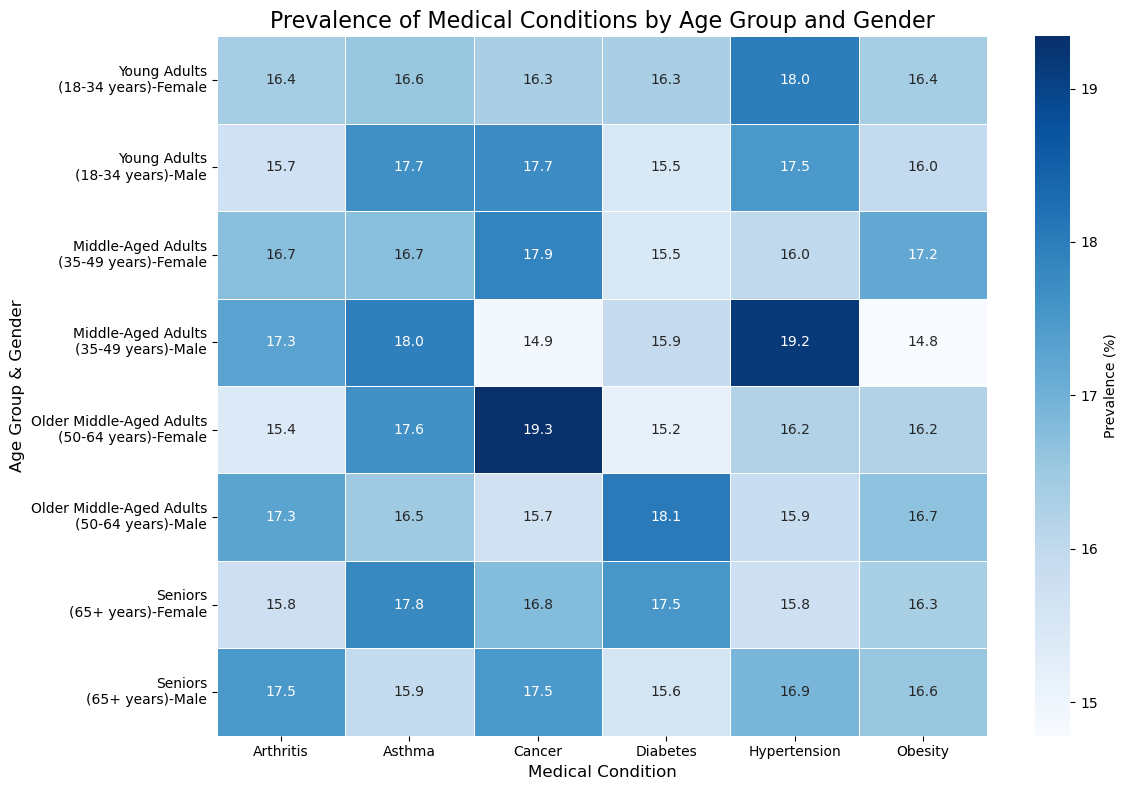

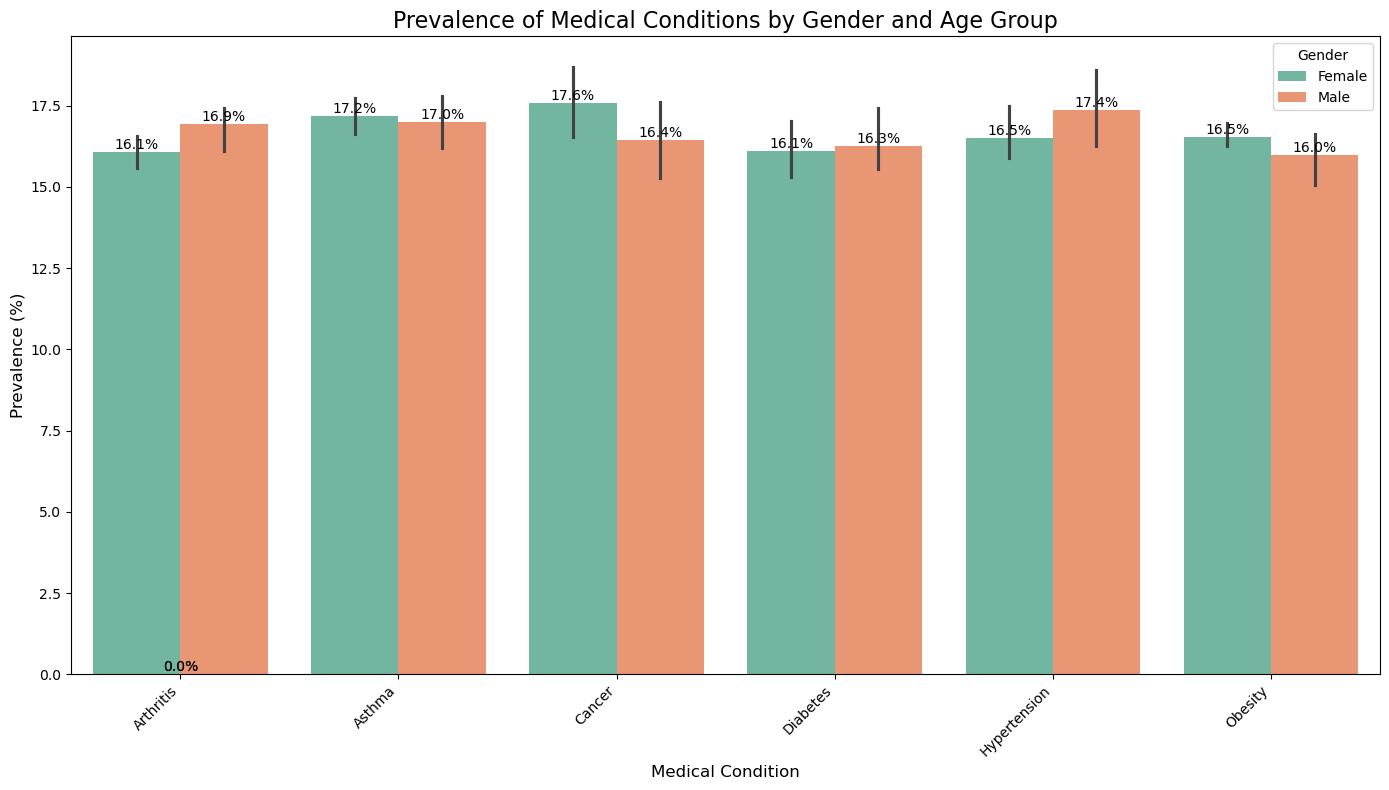

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Step 1: Create a Cross-tabulation for Age Group and Gender by Medical Condition
age_gender_crosstab = pd.crosstab(
    [dh['Age Group'], dh['Gender']],  # Rows: Combination of Age Group and Gender
    dh['Medical Condition'],         # Columns: Medical Conditions
    normalize='index'                # Normalize by row to show prevalence percentages
) * 100

# Display the crosstab for reference
print("Prevalence of Conditions by Age Group and Gender:")
print(age_gender_crosstab)

# Step 2: Reset the index for visualization
age_gender_crosstab_reset = age_gender_crosstab.reset_index()

# Melt the data for visualization
melted_data = age_gender_crosstab_reset.melt(
    id_vars=['Age Group', 'Gender'], 
    var_name='Medical Condition', 
    value_name='Prevalence (%)'
)

# Step 3: Visualize the Prevalence with a Heatmap
plt.figure(figsize=(12, 8))
heatmap_data = pd.pivot_table(
    melted_data, 
    values='Prevalence (%)', 
    index=['Age Group', 'Gender'], 
    columns='Medical Condition'
)

sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt='.1f', 
    cmap='Blues', 
    linewidths=0.5, 
    cbar_kws={'label': 'Prevalence (%)'}
)
plt.title('Prevalence of Medical Conditions by Age Group and Gender', fontsize=16)
plt.xlabel('Medical Condition', fontsize=12)
plt.ylabel('Age Group & Gender', fontsize=12)
plt.tight_layout()
plt.savefig("prevalence_heatmap.png")
plt.show()
# Step 4: Optional Bar Plot Visualization with Counts
plt.figure(figsize=(14, 8))

# Create the bar plot
barplot = sns.barplot(
    data=melted_data,
    x='Medical Condition',
    y='Prevalence (%)',
    hue='Gender',
    palette='Set2'
)

# Add counts (values) on top of each bar
for p in barplot.patches:
    bar_height = p.get_height()  # Get the height of the bar
    if not pd.isna(bar_height):  # Check if the value is not NaN
        barplot.annotate(
            f'{bar_height:.1f}%',  # Format the text as a percentage
            (p.get_x() + p.get_width() / 2., bar_height),  # Set position on the bar
            ha='center',  # Center horizontally
            va='bottom',  # Position the label above the bar
            fontsize=10,
            color='black'
        )

# Customize the plot
plt.title('Prevalence of Medical Conditions by Gender and Age Group', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Medical Condition', fontsize=12)
plt.ylabel('Prevalence (%)', fontsize=12)
plt.legend(title='Gender', loc='upper right')  # Adjust legend location
plt.tight_layout()

# Save and show the plot
plt.savefig("prevalence_barplot_with_counts.png")
plt.show()



Admission Type Distribution:
Admission Type
Urgent       3391
Emergency    3367
Elective     3242
Name: count, dtype: int64


C:\Users\heptu\AppData\Local\Temp\ipykernel_23596\2305429293.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dh, x='Admission Type', palette='viridis', order=dh['Admission Type'].value_counts().index)


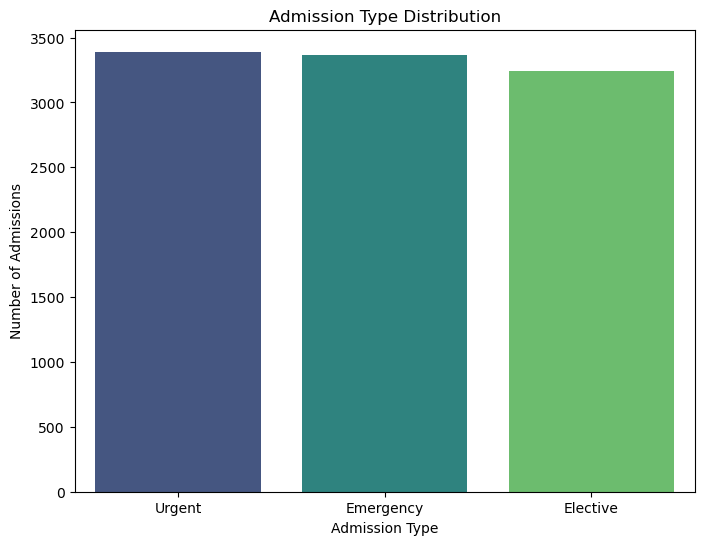

C:\Users\heptu\AppData\Local\Temp\ipykernel_23596\2305429293.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dh, x='Age Group', y='Admission Duration', palette='viridis')


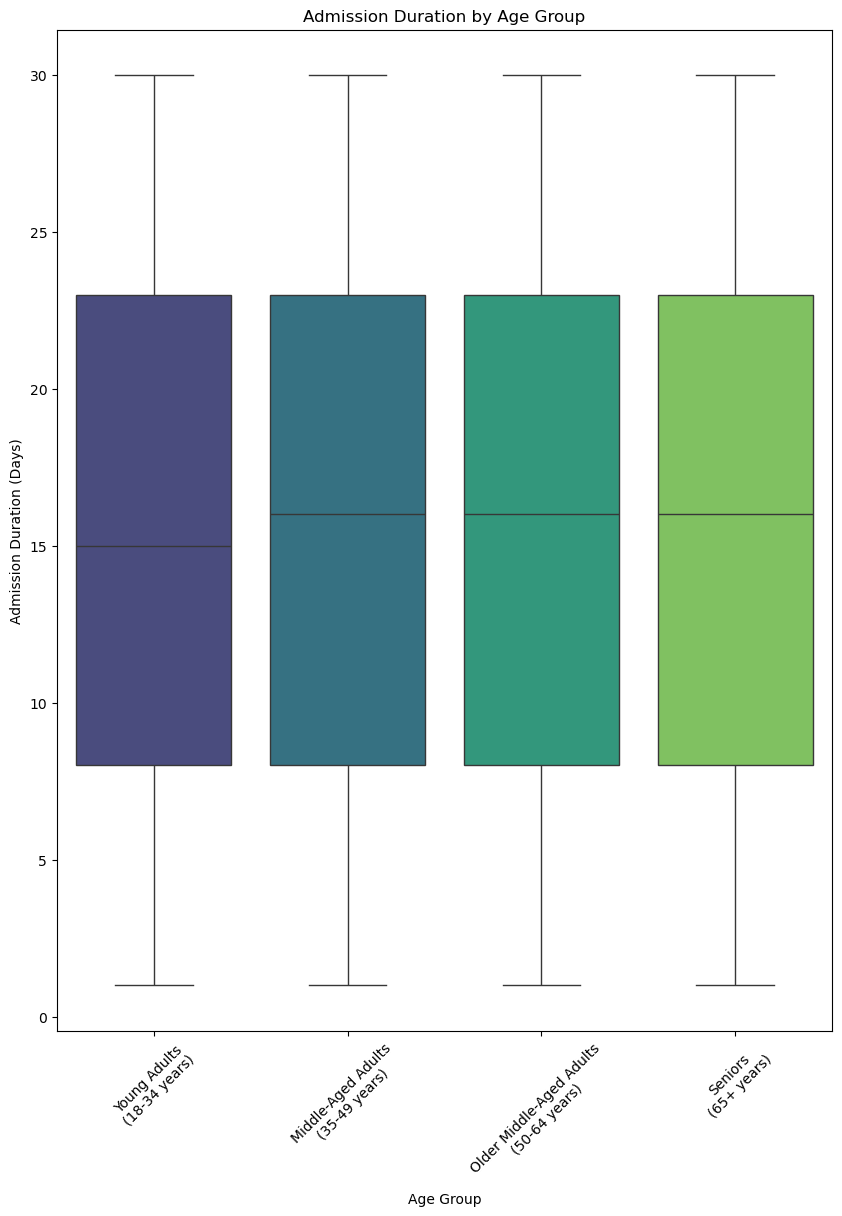

In [36]:
# 2. Admission Insights
# Admission Type Distribution
print("\nAdmission Type Distribution:")
print(dh['Admission Type'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(data=dh, x='Admission Type', palette='viridis', order=dh['Admission Type'].value_counts().index)
plt.title('Admission Type Distribution')
plt.xlabel('Admission Type')
plt.ylabel('Number of Admissions')
plt.savefig("b.png")
plt.show()

# Admission Duration by Age Group
plt.figure(figsize=(10, 13))
sns.boxplot(data=dh, x='Age Group', y='Admission Duration', palette='viridis')
plt.title('Admission Duration by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Admission Duration (Days)')
plt.xticks(rotation=45)
plt.savefig("h.png")
plt.show()

Hospital-Condition Crosstab for Top 20 Hospitals:
Medical Condition  Arthritis  Asthma  Cancer  Diabetes  Hypertension  Obesity
Hospital                                                                     
Brown LLC                1.0     0.0     2.0       1.0           3.0      3.0
Davis and Sons           4.0     0.0     2.0       2.0           0.0      1.0
Johnson Group            4.0     0.0     4.0       0.0           3.0      0.0
Johnson Ltd              2.0     2.0     2.0       3.0           0.0      2.0
Johnson PLC              1.0     4.0     1.0       2.0           3.0      2.0
Jones Inc                3.0     0.0     2.0       1.0           1.0      2.0
Jones LLC                3.0     1.0     1.0       2.0           1.0      1.0
Jones Ltd                0.0     2.0     0.0       2.0           3.0      2.0
Miller and Sons          0.0     3.0     3.0       1.0           0.0      2.0
Moore Ltd                0.0     3.0     1.0       1.0           2.0      1.0
Smith Group   

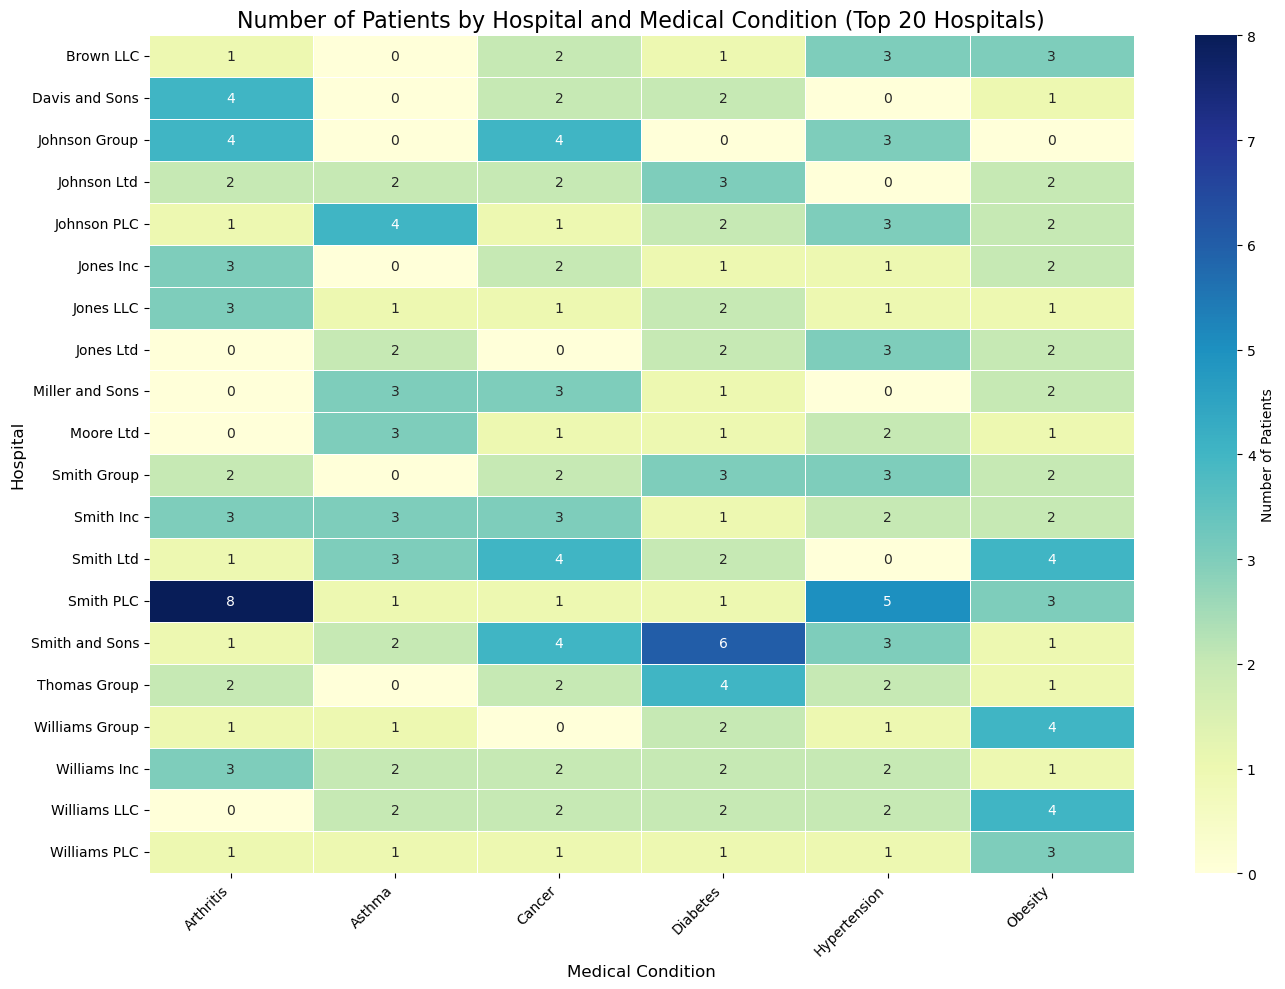

C:\Users\heptu\AppData\Local\Temp\ipykernel_23596\2971229004.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


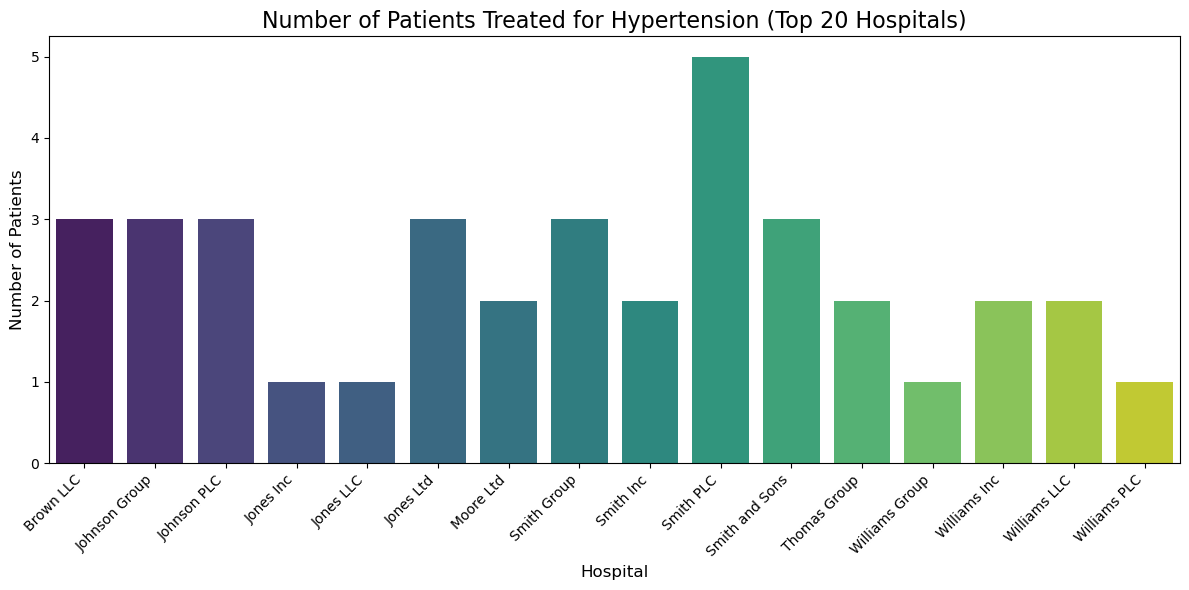

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Group by Hospital and Medical Condition
hospital_condition = dh.groupby(['Hospital', 'Medical Condition'])['Name'].count().reset_index()
hospital_condition = hospital_condition.rename(columns={'Name': 'Count'})

# Step 2: Filter for Top 20 Hospitals
# Calculate total patient counts per hospital
top_20_hospitals = (
    dh.groupby('Hospital')['Name']
    .count()
    .sort_values(ascending=False)
    .head(20)
    .index
)

# Filter data for the top 20 hospitals
filtered_data = hospital_condition[hospital_condition['Hospital'].isin(top_20_hospitals)]

# Step 3: Create a Cross-tabulation for Top 20 Hospitals
hospital_condition_crosstab = pd.crosstab(
    filtered_data['Hospital'], 
    filtered_data['Medical Condition'], 
    values=filtered_data['Count'], 
    aggfunc='sum'
).fillna(0)

print("Hospital-Condition Crosstab for Top 20 Hospitals:")
print(hospital_condition_crosstab)

# Step 4: Heatmap Visualization for Conditions Treated by Top 20 Hospitals
plt.figure(figsize=(14, 10))
sns.heatmap(
    hospital_condition_crosstab, 
    cmap='YlGnBu', 
    linewidths=0.5, 
    annot=True, 
    fmt='.0f', 
    cbar_kws={'label': 'Number of Patients'}
)
plt.title('Number of Patients by Hospital and Medical Condition (Top 20 Hospitals)', fontsize=16)
plt.xlabel('Medical Condition', fontsize=12)
plt.ylabel('Hospital', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig("top_20_hospitals_conditions_heatmap.png")
plt.show()

# Step 5: Optional Bar Plot for a Specific Medical Condition
# Example: Analyzing "Hypertension" across Top 20 Hospitals
specific_condition = "Hypertension"
condition_data = filtered_data[filtered_data['Medical Condition'] == specific_condition]

plt.figure(figsize=(12, 6))
sns.barplot(
    data=condition_data,
    x='Hospital',
    y='Count',
    palette='viridis'
)
plt.title(f'Number of Patients Treated for {specific_condition} (Top 20 Hospitals)', fontsize=16)
plt.xlabel('Hospital', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.savefig(f"top_20_hospitals_{specific_condition}_barplot.png")
plt.show()


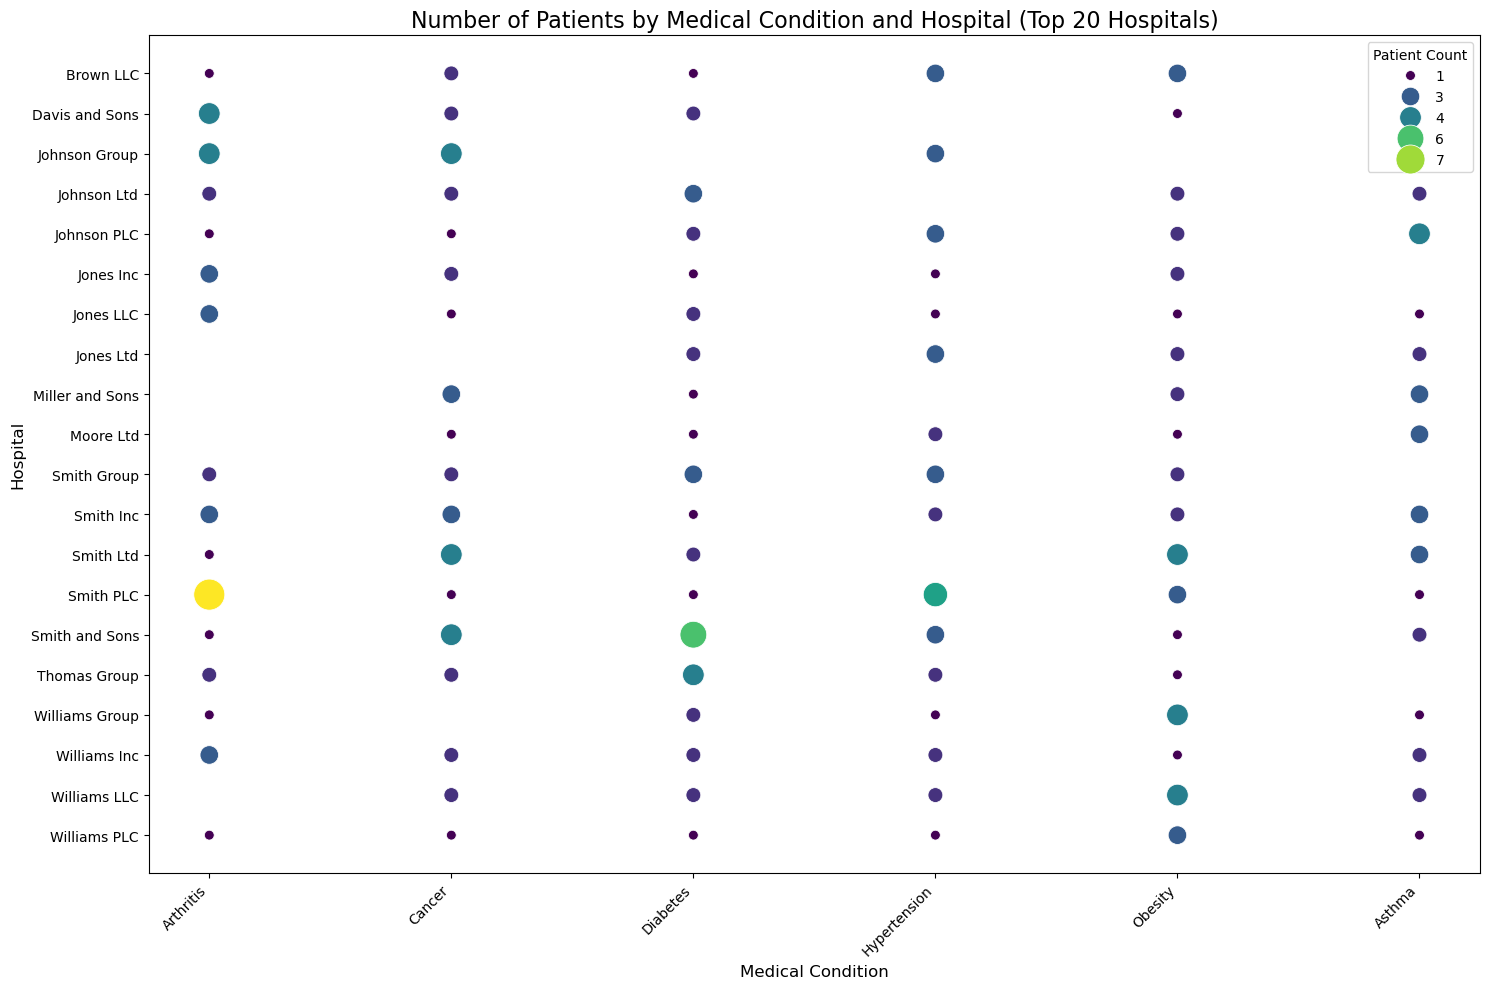

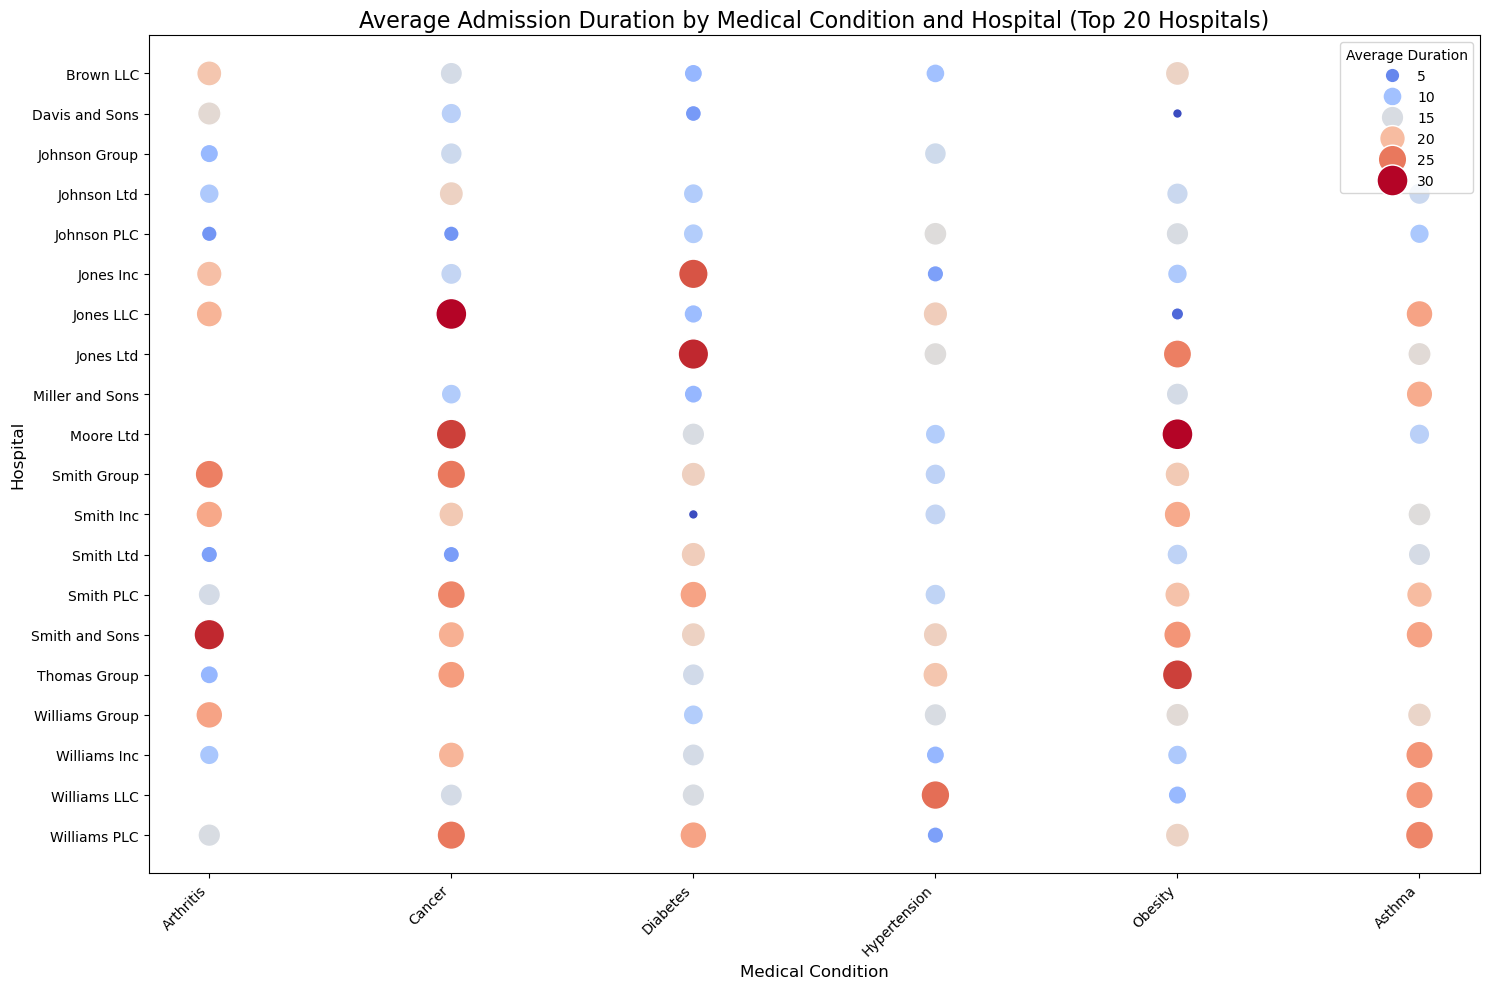

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Prepare Data for Top 20 Hospitals by Patient Count
top_20_hospitals = (
    dh.groupby('Hospital').size()  # Count patients per hospital
    .sort_values(ascending=False)
    .head(20)
    .index
)

# Filter data for the top 20 hospitals
filtered_data = dh[dh['Hospital'].isin(top_20_hospitals)]

# Step 2: Visualization for Number of Patients
# Group by Hospital and Medical Condition to count the number of patients
patient_counts = (
    filtered_data.groupby(['Hospital', 'Medical Condition'])
    .size()
    .reset_index(name='Patient Count')
)

plt.figure(figsize=(15, 10))
sns.scatterplot(
    data=patient_counts,
    x='Medical Condition',
    y='Hospital',
    size='Patient Count',  # Number of Patients
    sizes=(50, 500),  # Adjust size range
    hue='Patient Count',  # Number of Patients
    palette='viridis',
    legend='brief'
)
plt.title('Number of Patients by Medical Condition and Hospital (Top 20 Hospitals)', fontsize=16)
plt.xlabel('Medical Condition', fontsize=12)
plt.ylabel('Hospital', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.savefig("patients_conditions_hospitals.png")
plt.show()

# Step 3: Visualization for Average Admission Duration
# Calculate average admission duration for each condition and hospital
hospital_duration = (
    filtered_data.groupby(['Hospital', 'Medical Condition'])['Admission Duration']
    .mean()
    .reset_index()
    .rename(columns={'Admission Duration': 'Average Duration'})
)

plt.figure(figsize=(15, 10))
sns.scatterplot(
    data=hospital_duration,
    x='Medical Condition',
    y='Hospital',
    size='Average Duration',  # Average Admission Duration
    sizes=(50, 500),  # Adjust size range
    hue='Average Duration',  # Average Duration
    palette='coolwarm',
    legend='brief'
)
plt.title('Average Admission Duration by Medical Condition and Hospital (Top 20 Hospitals)', fontsize=16)
plt.xlabel('Medical Condition', fontsize=12)
plt.ylabel('Hospital', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.savefig("duration_conditions_hospitals.png")
plt.show()



Top 10 Hospitals by Admissions:
Hospital
Smith PLC         19
Smith and Sons    17
Smith Ltd         14
Smith Inc         14
Johnson PLC       13
Williams LLC      12
Smith Group       12
Williams Inc      12
Johnson Group     11
Johnson Ltd       11
Name: count, dtype: int64


C:\Users\heptu\AppData\Local\Temp\ipykernel_23596\4136324594.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dh[dh['Hospital'].isin(top_10_hospitals.index)], y='Hospital', palette='viridis', order=top_10_hospitals.index)


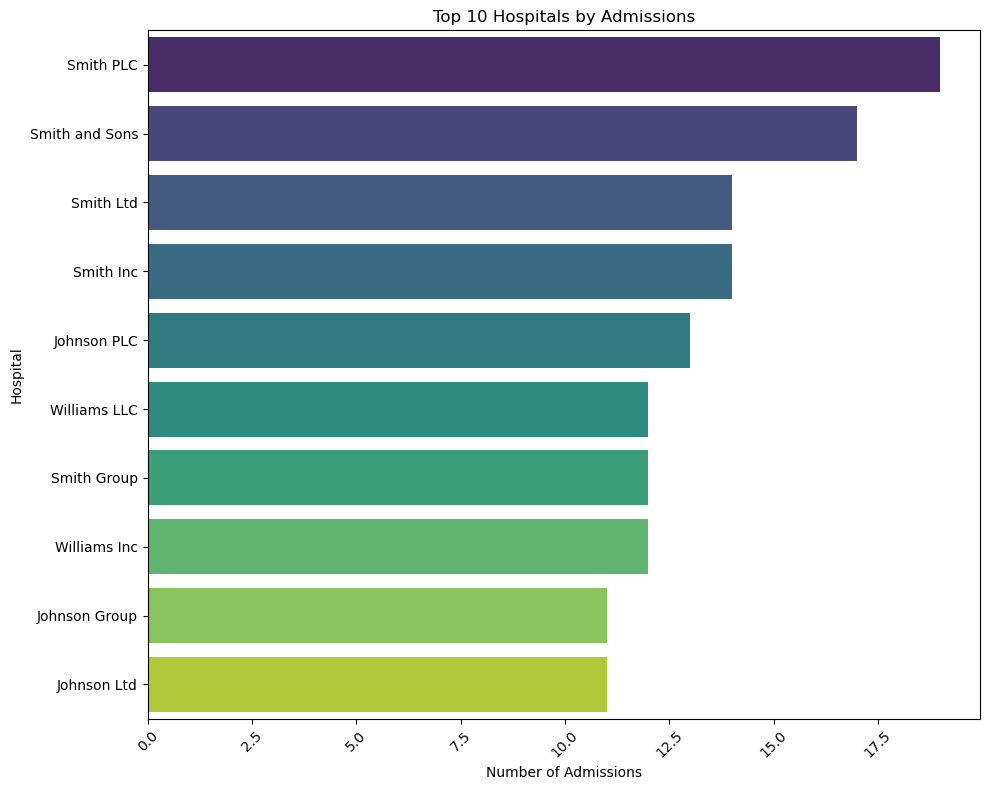

In [38]:
# 5. Hospital Performance
# Filter top 10 hospitals
top_10_hospitals = dh['Hospital'].value_counts().nlargest(10)
print("\nTop 10 Hospitals by Admissions:")
print(top_10_hospitals)

# Plot the top 10 hospitals
plt.figure(figsize=(10, 8))
sns.countplot(data=dh[dh['Hospital'].isin(top_10_hospitals.index)], y='Hospital', palette='viridis', order=top_10_hospitals.index)
plt.title('Top 10 Hospitals by Admissions')
plt.xlabel('Number of Admissions')
plt.ylabel('Hospital')
plt.xticks(rotation=45)  # Rotate x-ticks because counts are on the x-axis
plt.tight_layout()
plt.savefig("v.png")
plt.show()

C:\Users\heptu\AppData\Local\Temp\ipykernel_23596\1619898420.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dh, x='Age Group', y='Billing Amount', palette='viridis')


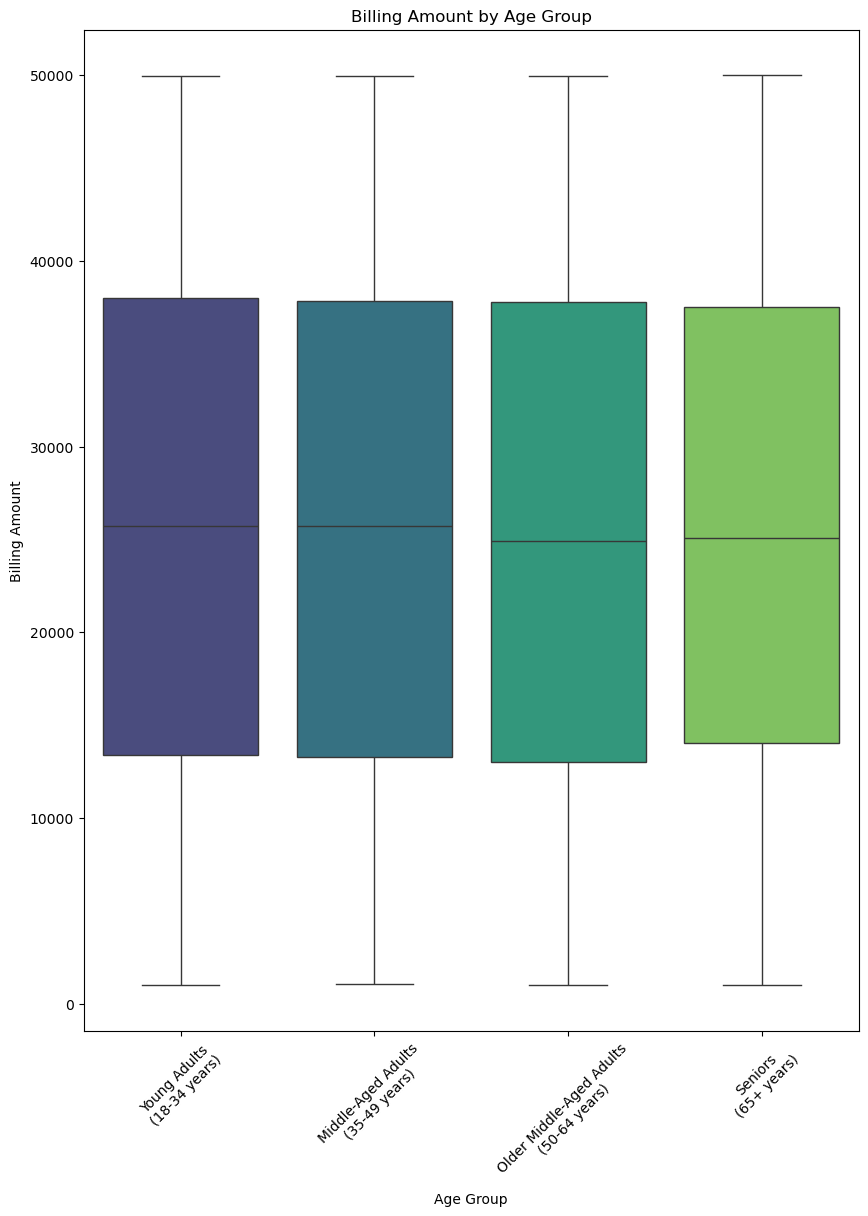

In [37]:
# 3. Billing Analysis
# Billing Amount by Age Group
plt.figure(figsize=(10, 13))
sns.boxplot(data=dh, x='Age Group', y='Billing Amount', palette='viridis')
plt.title('Billing Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Billing Amount')
plt.xticks(rotation=45)
plt.savefig("c.png")
plt.show()

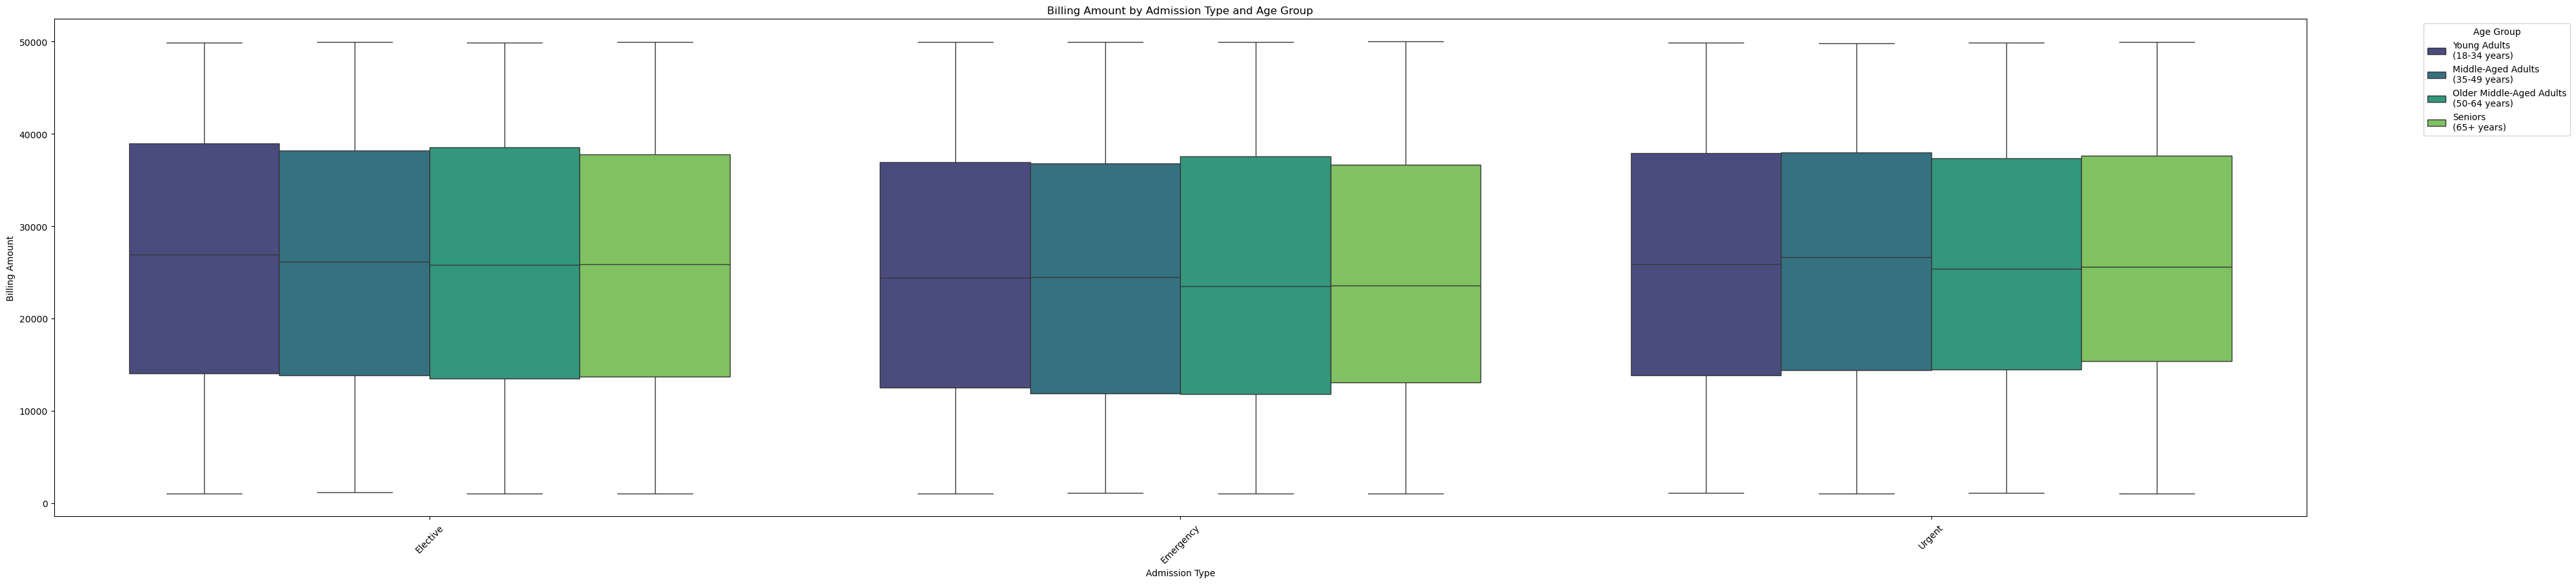

In [46]:
# 2. Segmentation Analysis
# Billing Amount by Admission Type and Age Group
plt.figure(figsize=(45, 10))
sns.boxplot(data=dh, x='Admission Type', y='Billing Amount', hue='Age Group', palette='viridis')
plt.title('Billing Amount by Admission Type and Age Group')
plt.xlabel('Admission Type')
plt.ylabel('Billing Amount')
plt.xticks(rotation=45)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("d.png")
plt.show()



Average Billing Amount by Insurance Provider:
Insurance Provider
Aetna               25837.923338
Cigna               25656.946859
Blue Cross          25652.489617
UnitedHealthcare    25404.685388
Medicare            25002.480429
Name: Billing Amount, dtype: float64


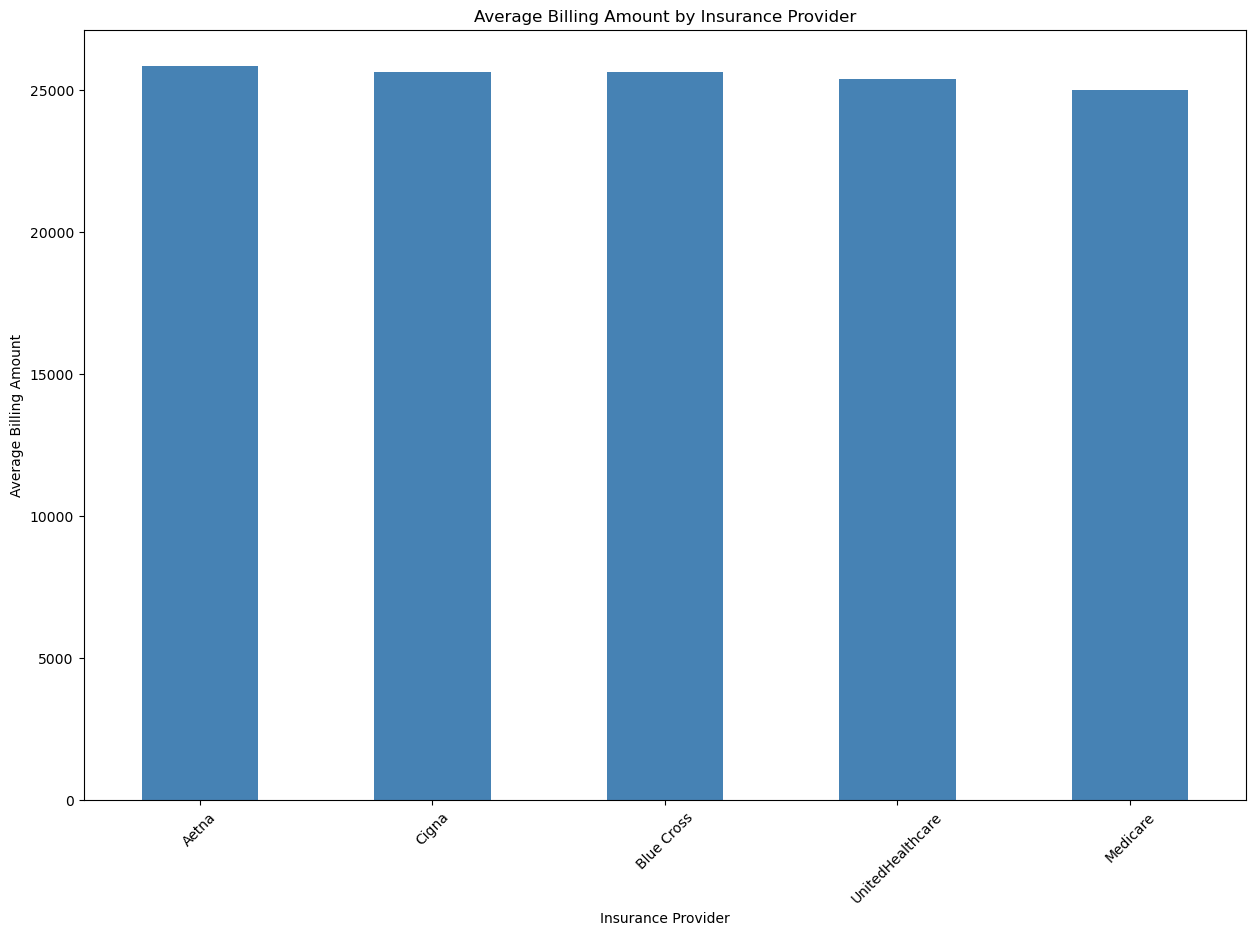

In [47]:
# 3. Insurance Provider Insights
# Average Billing by Insurance Provider
insurance_billing = dh.groupby('Insurance Provider')['Billing Amount'].mean().sort_values(ascending=False)
print("\nAverage Billing Amount by Insurance Provider:")
print(insurance_billing)

plt.figure(figsize=(15, 10))
insurance_billing.plot(kind='bar', color='steelblue')
plt.title('Average Billing Amount by Insurance Provider')
plt.xlabel('Insurance Provider')
plt.ylabel('Average Billing Amount')
plt.xticks(rotation=45)
plt.savefig("w.png")
plt.show()


Hospital Performance (Average Admission Duration and Billing Amount):
                             Admission Duration  Billing Amount
Hospital                                                       
Abbott Inc                                 30.0     32114.20515
Abbott LLC                                 13.5     10497.36250
Abbott PLC                                  4.0     31786.83098
Abbott, Curry and Moore                    14.0     11869.28365
Abbott-Jordan                              28.0     25326.80555
...                                         ...             ...
Zimmerman, Salinas and Hill                27.0     44147.79355
Zuniga Ltd                                 12.0     25298.39650
Zuniga, Taylor and Scott                   13.0     15868.93558
Zuniga-Chandler                            17.0     34439.13691
Zuniga-Johnson                              2.0     22624.00546

[8639 rows x 2 columns]


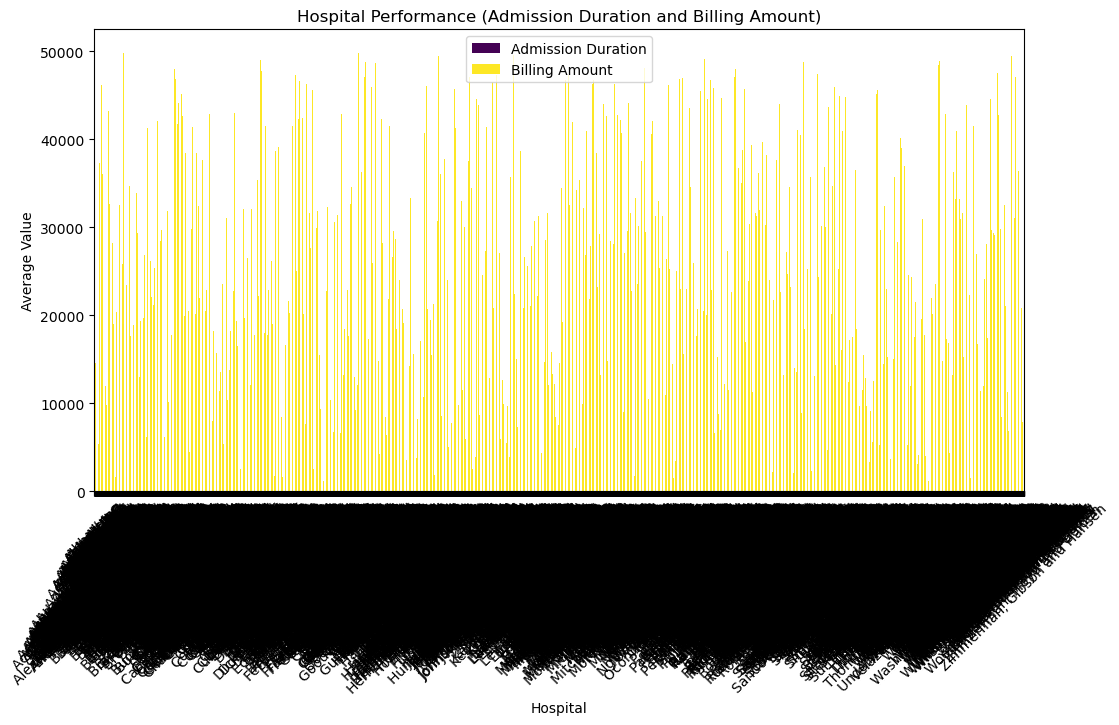

In [102]:
# 4. Hospital Performance Analysis
# Average Admission Duration and Billing Amount by Hospital
hospital_performance = dh.groupby('Hospital')[['Admission Duration', 'Billing Amount']].mean()
print("\nHospital Performance (Average Admission Duration and Billing Amount):")
print(hospital_performance)

hospital_performance.plot(kind='bar', figsize=(12, 6), stacked=True, colormap='viridis')
plt.title('Hospital Performance (Admission Duration and Billing Amount)')
plt.xlabel('Hospital')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.show()


Average Billing Amount for Top 5 Medical Conditions:
Medical Condition
Arthritis       25187.631255
Asthma          25416.869895
Cancer          25539.096133
Diabetes        26060.116129
Hypertension    25198.033973
Obesity         25720.842683
Name: Billing Amount, dtype: float64


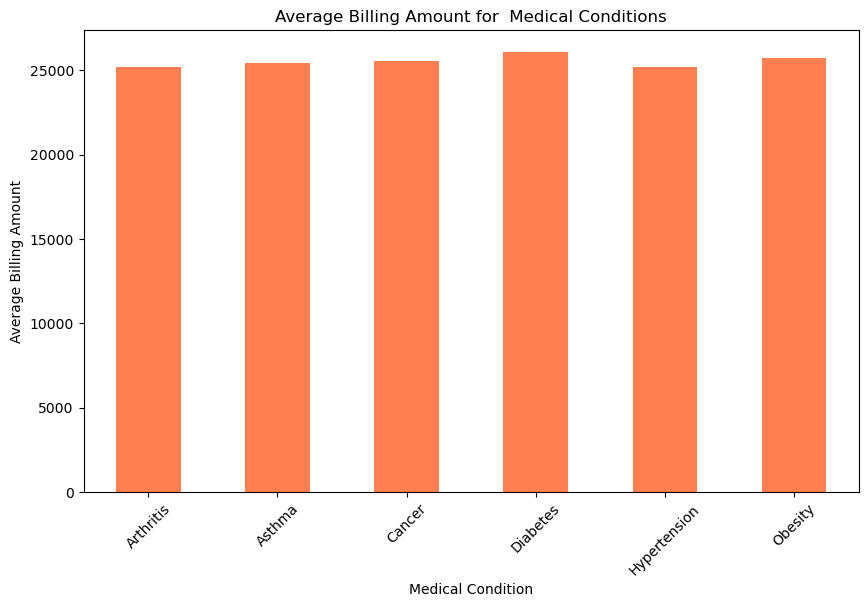

In [79]:
# 5. Medical Condition Segmentation
# Billing Amount for Top 5 Medical Conditions
top_conditions = dh['Medical Condition'].value_counts().head(6).index
condition_billing = dh[dh['Medical Condition'].isin(top_conditions)].groupby('Medical Condition')['Billing Amount'].mean()
print("\nAverage Billing Amount for Top 5 Medical Conditions:")
print(condition_billing)

plt.figure(figsize=(10, 6))
condition_billing.plot(kind='bar', color='coral')
plt.title('Average Billing Amount for  Medical Conditions')
plt.xlabel('Medical Condition')
plt.ylabel('Average Billing Amount')
plt.xticks(rotation=45)
plt.savefig("t.png")
plt.show()


In [78]:
import pandas as pd

# Step 1: Group the data by Hospital, Medical Condition, and Admission Type to calculate the average Billing Amount
cost_analysis = (
    dh.groupby(['Hospital', 'Medical Condition', 'Admission Type'])['Billing Amount']
    .mean()
    .reset_index()
    .rename(columns={'Billing Amount': 'Average Billing Amount'})
)

# Step 2: Pivot the table to display Hospital and Medical Condition as rows, Admission Type as columns
pivot_table = cost_analysis.pivot_table(
    index=['Hospital', 'Medical Condition'],  # Rows: Hospital and Medical Condition
    columns='Admission Type',                 # Columns: Admission Type (Elective vs Emergency)
    values='Average Billing Amount',          # Values: Average Billing Amount
    aggfunc='mean',                           # In case of multiple rows for the same hospital, condition, and admission type
    fill_value=0                              # Fill NaN values with 0 if necessary
).reset_index()

# Step 3: Flatten the MultiIndex columns for clarity
pivot_table.columns = [' '.join(col).strip() if isinstance(col, tuple) else col for col in pivot_table.columns]

# Step 4: Display the table
print(pivot_table)

# Optional: Save the table to an Excel file for further reporting or sharing
pivot_table.to_excel('cost_per_admission_type_comparison.xlsx', index=False)

print("Table saved as 'cost_per_admission_type_comparison.xlsx'")


                         Hospital Medical Condition     Elective    Emergency  \
0                      Abbott Inc         Arthritis  32114.20515      0.00000   
1                      Abbott LLC         Arthritis  10269.93080      0.00000   
2                      Abbott LLC      Hypertension      0.00000      0.00000   
3                      Abbott PLC         Arthritis      0.00000  31786.83098   
4         Abbott, Curry and Moore            Asthma  11869.28365      0.00000   
...                           ...               ...          ...          ...   
9566  Zimmerman, Salinas and Hill            Cancer      0.00000  44147.79355   
9567                   Zuniga Ltd            Asthma  25298.39650      0.00000   
9568     Zuniga, Taylor and Scott            Asthma  15868.93558      0.00000   
9569              Zuniga-Chandler      Hypertension      0.00000      0.00000   
9570               Zuniga-Johnson           Obesity      0.00000  22624.00546   

           Urgent  
0      

In [77]:
import pandas as pd

# Step 1: Group data by Admission Type and Age Group, calculate statistics
billing_analysis = (
    dh.groupby(['Admission Type', 'Age Group'])['Billing Amount']
    .agg(['mean', 'median', 'count'])
    .reset_index()
    .rename(columns={
        'mean': 'Average Billing Amount',
        'median': 'Median Billing Amount',
        'count': 'Number of Patients'
    })
)

# Step 2: Pivot the table for better readability
pivot_table = billing_analysis.pivot_table(
    index='Admission Type',    # Rows: Admission Type
    columns='Age Group',       # Columns: Age Group
    values=['Average Billing Amount', 'Median Billing Amount', 'Number of Patients']
).reset_index()

# Flatten the MultiIndex columns for clarity
pivot_table.columns = [' '.join(col).strip() if isinstance(col, tuple) else col for col in pivot_table.columns]

# Step 3: Display the table
print(pivot_table)

# Optional: Save the table to an Excel file for further reporting
pivot_table.to_excel('billing_amount_analysis_table.xlsx', index=False)

print("Table saved as 'billing_amount_analysis_table.xlsx'")


  Admission Type  Average Billing Amount Young Adults\n(18-34 years)  \
0       Elective                                       26311.070006    
1      Emergency                                       24928.503849    
2         Urgent                                       25884.051222    

   Average Billing Amount Middle-Aged Adults\n(35-49 years)  \
0                                       25778.317627          
1                                       24543.601210          
2                                       26236.391988          

   Average Billing Amount Older Middle-Aged Adults\n(50-64 years)  \
0                                       25788.932371                
1                                       24530.629411                
2                                       25578.321649                

   Average Billing Amount Seniors\n(65+ years)  \
0                                 25711.009872   
1                                 24779.226140   
2                              

C:\Users\heptu\AppData\Local\Temp\ipykernel_23596\3671270835.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dh.groupby(['Admission Type', 'Age Group'])['Billing Amount']
C:\Users\heptu\AppData\Local\Temp\ipykernel_23596\3671270835.py:16: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = billing_analysis.pivot_table(



Most Common Medical Conditions:
Medical Condition
Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: count, dtype: int64


C:\Users\heptu\AppData\Local\Temp\ipykernel_7740\3025244751.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dh, y='Medical Condition', palette='viridis', order=dh['Medical Condition'].value_counts().head(10).index)


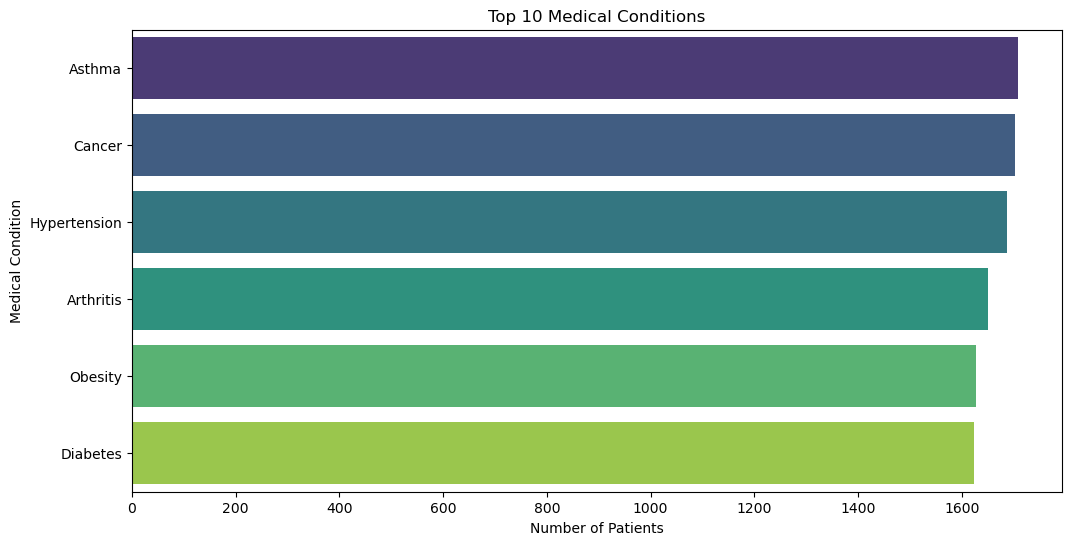

In [41]:
# 4. Medical Insights
# Most Common Medical Conditions
print("\nMost Common Medical Conditions:")
print(dh['Medical Condition'].value_counts().head(10))

plt.figure(figsize=(12, 6))
sns.countplot(data=dh, y='Medical Condition', palette='viridis', order=dh['Medical Condition'].value_counts().head(10).index)
plt.title('Top 10 Medical Conditions')
plt.xlabel('Number of Patients')
plt.ylabel('Medical Condition')
plt.show()

C:\Users\heptu\AppData\Local\Temp\ipykernel_23596\635601031.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disease_age = dh.groupby(['Age Group', 'Medical Condition']).size().unstack().fillna(0)



Disease Distribution by Age Group:
Medical Condition                        Arthritis  Asthma  Cancer  Diabetes  \
Age Group                                                                      
Young Adults\n(18-34 years)                    399     425     423       395   
Middle-Aged Adults\n(35-49 years)              371     378     358       342   
Older Middle-Aged Adults\n(50-64 years)        370     386     396       376   
Seniors\n(65+ years)                           510     519     526       510   

Medical Condition                        Hypertension  Obesity  
Age Group                                                       
Young Adults\n(18-34 years)                       441      402  
Middle-Aged Adults\n(35-49 years)                 383      349  
Older Middle-Aged Adults\n(50-64 years)           363      372  
Seniors\n(65+ years)                              501      505  


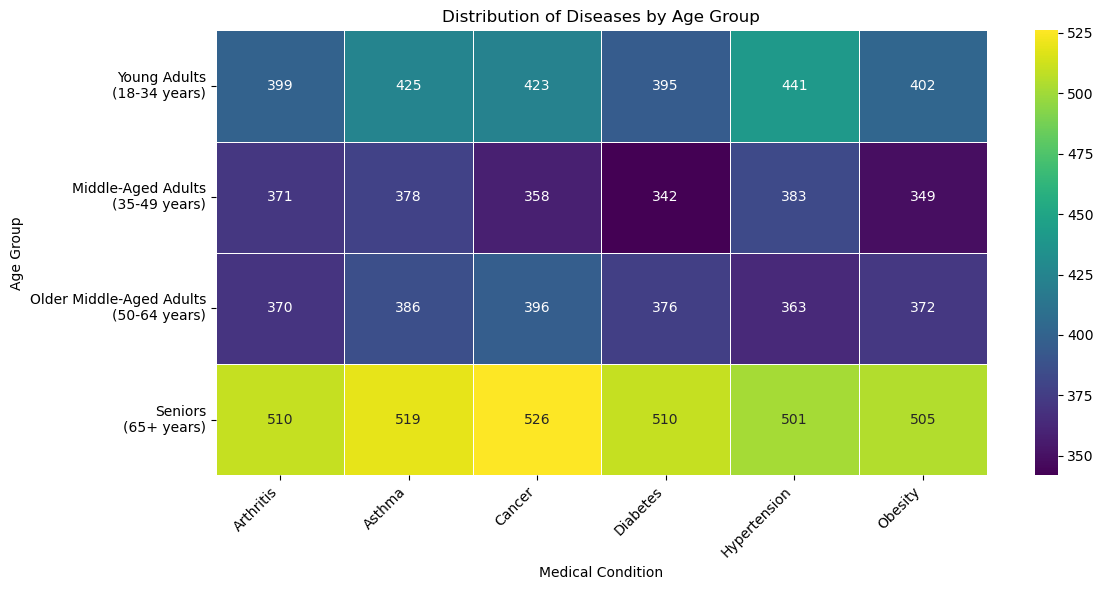

In [73]:
# Disease distribution across age groups
disease_age = dh.groupby(['Age Group', 'Medical Condition']).size().unstack().fillna(0)

print("\nDisease Distribution by Age Group:")
print(disease_age)

plt.figure(figsize=(12, 6))
sns.heatmap(disease_age, cmap='viridis', linewidths=0.5, annot=True, fmt=".0f")
plt.title('Distribution of Diseases by Age Group')
plt.xlabel('Medical Condition')
plt.ylabel('Age Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("a.png")
plt.show()


In [69]:
import pandas as pd

# Calculate the percentage distribution of blood types across medical conditions
blood_type_percentages = (
    dh.groupby('Medical Condition')['Blood Type']
    .value_counts(normalize=True)  # Get normalized counts (percentages)
    .unstack() * 100  # Convert to percentage
)

# Reset index for a clean table
blood_type_percentages.reset_index(inplace=True)

# Rename columns for better readability
blood_type_percentages.rename_axis(None, axis=1, inplace=True)  # Remove index name
blood_type_percentages.rename(columns={'Medical Condition': 'Medical Condition'}, inplace=True)

# Add a 'Total Percentage' column (always 100% for validation)
blood_type_percentages['Total Percentage'] = blood_type_percentages.iloc[:, 1:].sum(axis=1)

# Display the table
print(blood_type_percentages)

# Save the table to an Excel file for further use
blood_type_percentages.to_excel("percentage_distribution_table.xlsx", index=False)

print("Table saved as 'percentage_distribution_table.xlsx'")


  Medical Condition         A+         A-        AB+        AB-         B+  \
0         Arthritis  12.242424  12.242424  13.272727  12.363636  11.878788   
1            Asthma  12.880562  12.177986  11.651054  12.295082  12.704918   
2            Cancer  12.859659  12.800940  12.213740  11.450382  12.566060   
3          Diabetes  12.138016  12.692545  12.754159  13.185459  12.754159   
4      Hypertension  12.618483  12.559242  12.500000  13.329384  12.500000   
5           Obesity  11.670762  11.793612  13.144963  13.943489  12.223587   

          B-         O+         O-  Total Percentage  
0  11.272727  13.636364  13.090909             100.0  
1  12.763466  13.290398  12.236534             100.0  
2  12.977099  13.153259  11.978861             100.0  
3  13.616759  10.720887  12.138016             100.0  
4  11.611374  12.381517  12.500000             100.0  
5  12.899263  11.609337  12.714988             100.0  
Table saved as 'percentage_distribution_table.xlsx'



Insurance Providers with Respect to Medications:
Medication          Aspirin  Ibuprofen  Lipitor  Paracetamol  Penicillin
Insurance Provider                                                      
Aetna                   412        402      440          368         403
Blue Cross              364        436      388          416         428
Cigna                   408        384      402          433         413
Medicare                390        382      376          360         417
UnitedHealthcare        394        372      409          385         418


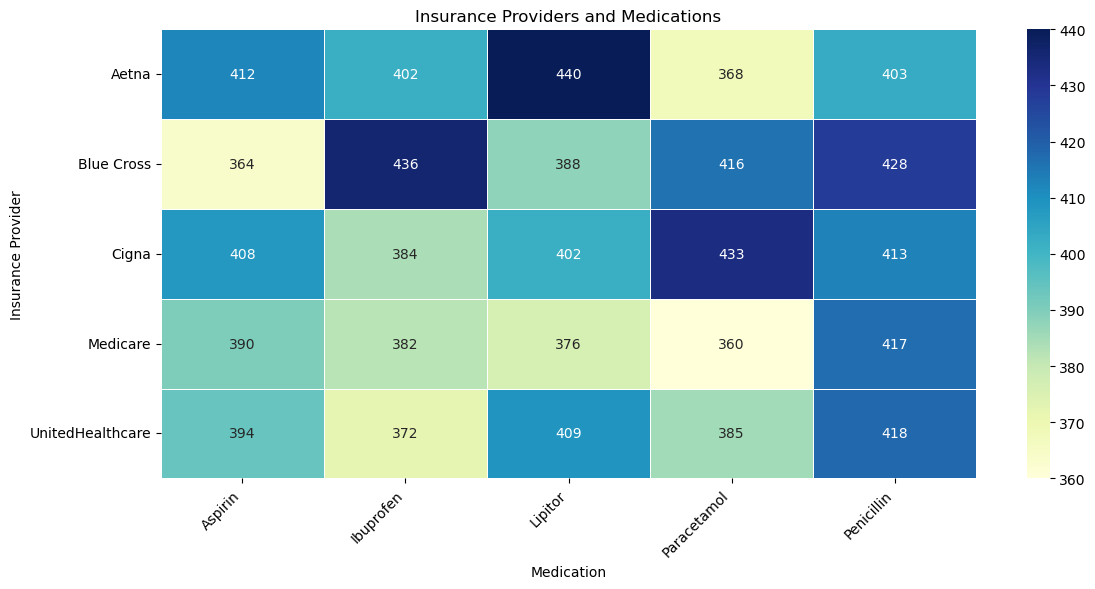


Insurance Providers with Respect to Test Results:
Test Results        Abnormal  Inconclusive  Normal
Insurance Provider                                
Aetna                    698           658     669
Blue Cross               701           667     664
Cigna                    697           650     693
Medicare                 658           635     632
UnitedHealthcare         702           667     609


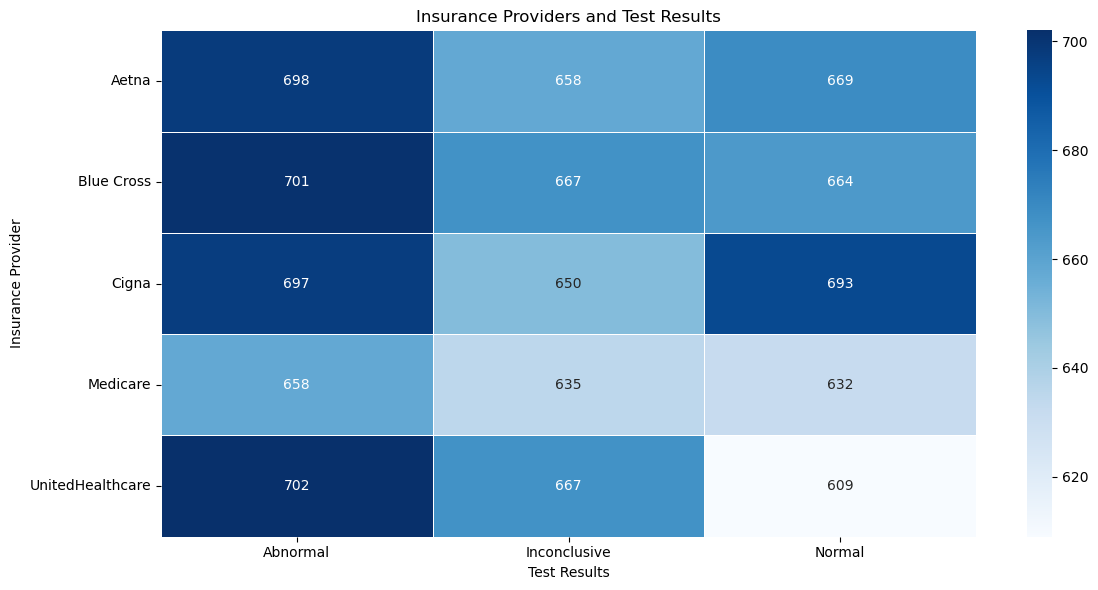

In [55]:
# Insurance provider with respect to medication
insurance_medication = dh.groupby(['Insurance Provider', 'Medication']).size().unstack().fillna(0)

print("\nInsurance Providers with Respect to Medications:")
print(insurance_medication)

plt.figure(figsize=(12, 6))
sns.heatmap(insurance_medication, cmap='YlGnBu', linewidths=0.5, annot=True, fmt=".0f")
plt.title('Insurance Providers and Medications')
plt.xlabel('Medication')
plt.ylabel('Insurance Provider')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Insurance provider with respect to test results
insurance_tests = dh.groupby(['Insurance Provider', 'Test Results']).size().unstack().fillna(0)

print("\nInsurance Providers with Respect to Test Results:")
print(insurance_tests)

plt.figure(figsize=(12, 6))
sns.heatmap(insurance_tests, cmap='Blues', linewidths=0.5, annot=True, fmt=".0f")
plt.title('Insurance Providers and Test Results')
plt.xlabel('Test Results')
plt.ylabel('Insurance Provider')
plt.tight_layout()
plt.savefig("q.png")
plt.show()


In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dh' is your original dataset
# Step 1: Create a pivot table to calculate the prevalence of each medical condition by gender and age group

# First, we calculate the percentage prevalence of each medical condition by gender and age group
pivot_data = dh.groupby(['Medical Condition', 'Gender', 'Age Group'])['Name'].count().reset_index()
pivot_data['Total'] = pivot_data.groupby(['Age Group', 'Gender'])['Name'].transform('sum')
pivot_data['Prevalence (%)'] = (pivot_data['Name'] / pivot_data['Total']) * 100

# Step 2: Create a table (pivot) to view the data
prevalence_table = pivot_data.pivot_table(
    index=['Medical Condition', 'Age Group'],
    columns='Gender',
    values='Prevalence (%)',
    aggfunc='mean'  # In case you want to average multiple rows with the same condition
).reset_index()

# Step 3: Display the table
print(prevalence_table)

# Optional: You can also save it to a CSV file if needed
prevalence_table.to_csv('medical_condition_prevalence_by_gender_age.csv', index=False)


Gender Medical Condition                                Age Group     Female  \
0              Arthritis              Young Adults\n(18-34 years)  16.400000   
1              Arthritis        Middle-Aged Adults\n(35-49 years)  16.726619   
2              Arthritis  Older Middle-Aged Adults\n(50-64 years)  15.418895   
3              Arthritis                     Seniors\n(65+ years)  15.776241   
4                 Asthma              Young Adults\n(18-34 years)  16.560000   
5                 Asthma        Middle-Aged Adults\n(35-49 years)  16.726619   
6                 Asthma  Older Middle-Aged Adults\n(50-64 years)  17.647059   
7                 Asthma                     Seniors\n(65+ years)  17.787555   
8                 Cancer              Young Adults\n(18-34 years)  16.320000   
9                 Cancer        Middle-Aged Adults\n(35-49 years)  17.895683   
10                Cancer  Older Middle-Aged Adults\n(50-64 years)  19.340463   
11                Cancer                

C:\Users\heptu\AppData\Local\Temp\ipykernel_23596\70383059.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_data = dh.groupby(['Medical Condition', 'Gender', 'Age Group'])['Name'].count().reset_index()
C:\Users\heptu\AppData\Local\Temp\ipykernel_23596\70383059.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_data['Total'] = pivot_data.groupby(['Age Group', 'Gender'])['Name'].transform('sum')
C:\Users\heptu\AppData\Local\Temp\ipykernel_23596\70383059.py:14: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify


Average Admission Duration by Hospital and Disease (Filled):
Medical Condition            Arthritis  Asthma  Cancer  Diabetes  \
Hospital                                                           
Abbott Inc                        30.0     0.0     0.0       0.0   
Abbott LLC                        19.0     0.0     0.0       0.0   
Abbott PLC                         4.0     0.0     0.0       0.0   
Abbott, Curry and Moore            0.0    14.0     0.0       0.0   
Abbott-Jordan                      0.0     0.0     0.0       0.0   
...                                ...     ...     ...       ...   
Zimmerman, Salinas and Hill        0.0     0.0    27.0       0.0   
Zuniga Ltd                         0.0    12.0     0.0       0.0   
Zuniga, Taylor and Scott           0.0    13.0     0.0       0.0   
Zuniga-Chandler                    0.0     0.0     0.0       0.0   
Zuniga-Johnson                     0.0     0.0     0.0       0.0   

Medical Condition            Hypertension  Obesity  


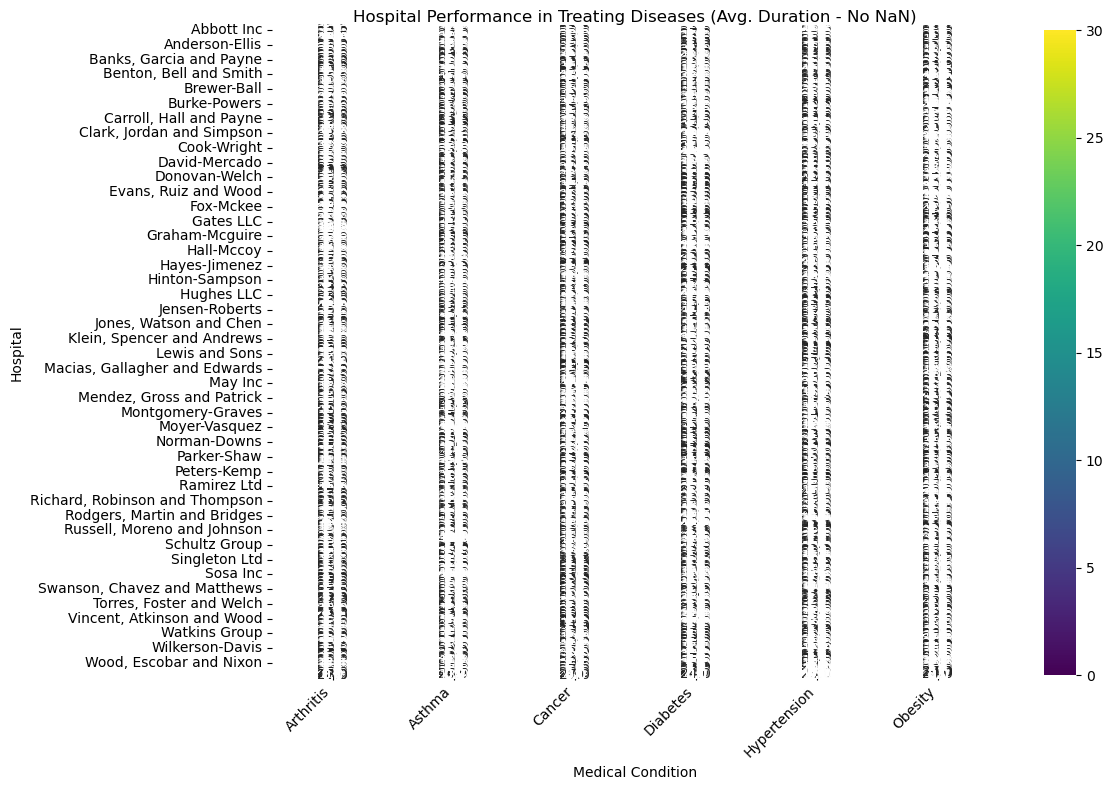

In [78]:
# Replace NaN with 0
hospital_disease_duration_filled = hospital_disease_duration.fillna(0)

print("\nAverage Admission Duration by Hospital and Disease (Filled):")
print(hospital_disease_duration_filled)

# Heatmap with filled NaN values
plt.figure(figsize=(12, 8))
sns.heatmap(hospital_disease_duration_filled, cmap='viridis', linewidths=0.5, annot=True, fmt=".1f")
plt.title('Hospital Performance in Treating Diseases (Avg. Duration - No NaN)')
plt.xlabel('Medical Condition')
plt.ylabel('Hospital')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Room Utilization:
      Room Number  count
0            358     44
1            230     40
2            257     38
3            469     37
4            195     36
..           ...    ...
395          160     14
396          306     14
397          321     14
398          373     14
399          352     10

[400 rows x 2 columns]
Hospital Performance:
                          Hospital  Billing Amount  Admission Duration
0                      Abbott Inc     32114.20515                30.0
1                      Abbott LLC     10497.36250                13.5
2                      Abbott PLC     31786.83098                 4.0
3         Abbott, Curry and Moore     11869.28365                14.0
4                   Abbott-Jordan     25326.80555                28.0
...                           ...             ...                 ...
8634  Zimmerman, Salinas and Hill     44147.79355                27.0
8635                   Zuniga Ltd     25298.39650                12.0
8636     Zuniga,

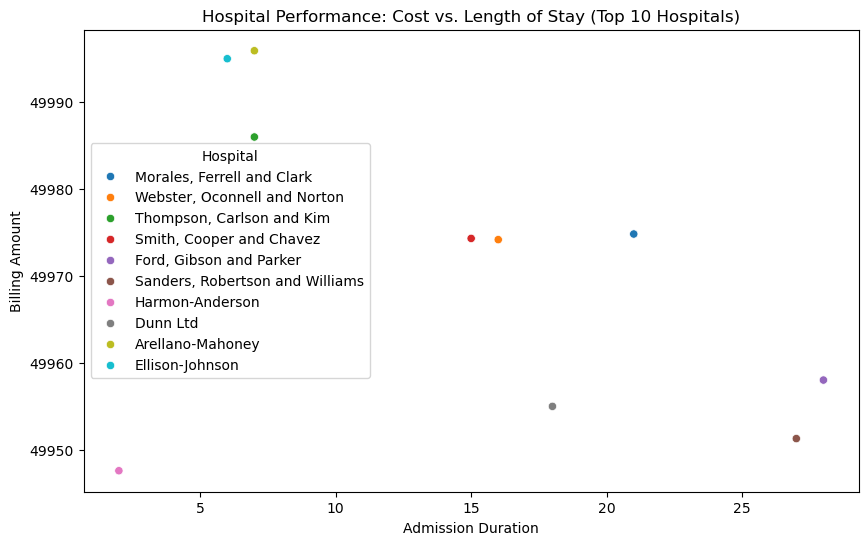

In [106]:
# investigate room utilization
room_utilization = dh['Room Number'].value_counts().reset_index()
print("Room Utilization:\n", room_utilization)

# Compare hospitals based on average patient costs, length of stay, and outcomes
hospital_performance = dh.groupby('Hospital')[['Billing Amount', 'Admission Duration']].mean().reset_index()
print("Hospital Performance:\n", hospital_performance)

# You can further analyze outcomes by including relevant outcome variables (e.g., discharge status)
# and using appropriate statistical tests or visualizations.

# Visualize hospital performance (example: average cost vs. length of stay)
plt.figure(figsize=(10, 6))

# Select top 10 hospitals by Billing Amount for visualization
top_hospitals = hospital_performance.sort_values(by=['Billing Amount'], ascending=False).head(10)['Hospital'].tolist()
filtered_dh = dh[dh['Hospital'].isin(top_hospitals)]

sns.scatterplot(x='Admission Duration', y='Billing Amount', hue='Hospital', data=filtered_dh)  # Use filtered_dh here
plt.title('Hospital Performance: Cost vs. Length of Stay (Top 10 Hospitals)')
plt.savefig("o.png")
plt.show()

# You can create other visualizations to compare hospitals based on different metrics.